In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
annual_combined_data = pd.read_excel("Yearly Data.xlsx", usecols=lambda x: 'Unnamed' not in x)

Total Population (Number)
Intercept of Regression 	: b =  [54869.15686182]
Coefficients of Regression 	: a =  [[-0.00291641]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.36263239774504696
Mean Squared Error (MSE) 	: 25647159.33171916

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.46633709168049664
Mean Squared Error (MSE) 	: 23008426.335419454

RMSE of test data = 4796.709949060862


Resident Population (Number)
Intercept of Regression 	: b =  [53507.97113615]
Coefficients of Regression 	: a =  [[-0.00329003]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2149173068004091
Mean Squared Error (MSE) 	: 14971706.640070645

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.22329022957970024
Mean Squared Error (MSE) 	: 10602874.703373061

RMSE of test data = 3256.2055683529966


Singapore Citizen Population (Number)
Intercept of Regression 	: b =  [63330.54266283]
Coefficients of Regression 	: a =  

/var/folders/51/ry5gb8r14r3c4t1pt9r3p3vh0000gn/T/ipykernel_69813/1805050231.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, axes = plt.subplots(1, 2, figsize=(24, 12))


Intercept of Regression 	: b =  [28690.15936932]
Coefficients of Regression 	: a =  [[1803.27850267]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33889596813339284
Mean Squared Error (MSE) 	: 11098272.513462728

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06877886249581644
Mean Squared Error (MSE) 	: 19645914.694187693

RMSE of test data = 4432.371227028225


Unemployment Rate
Intercept of Regression 	: b =  [51413.35960688]
Coefficients of Regression 	: a =  [[-3054.56609337]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34157801445091784
Mean Squared Error (MSE) 	: 12708239.573562652

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.37634393690941437
Mean Squared Error (MSE) 	: 5988745.624979462

RMSE of test data = 2447.191374817152




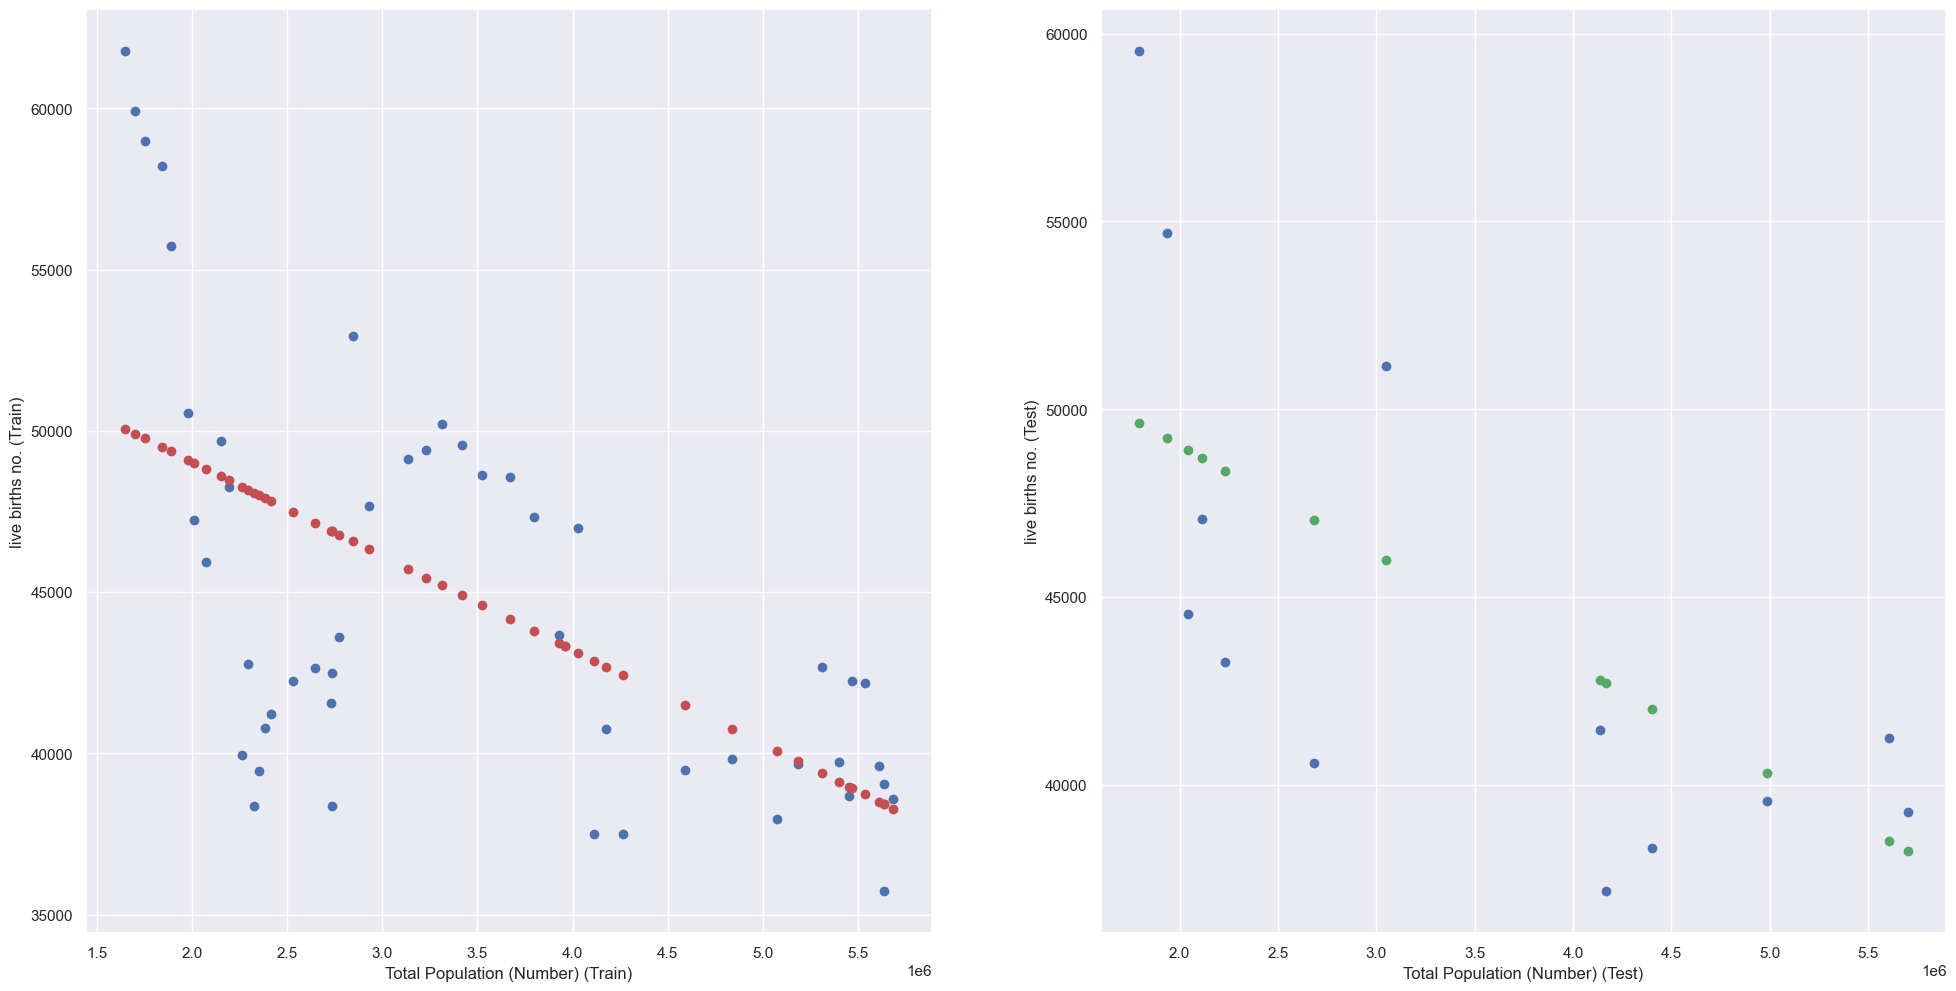

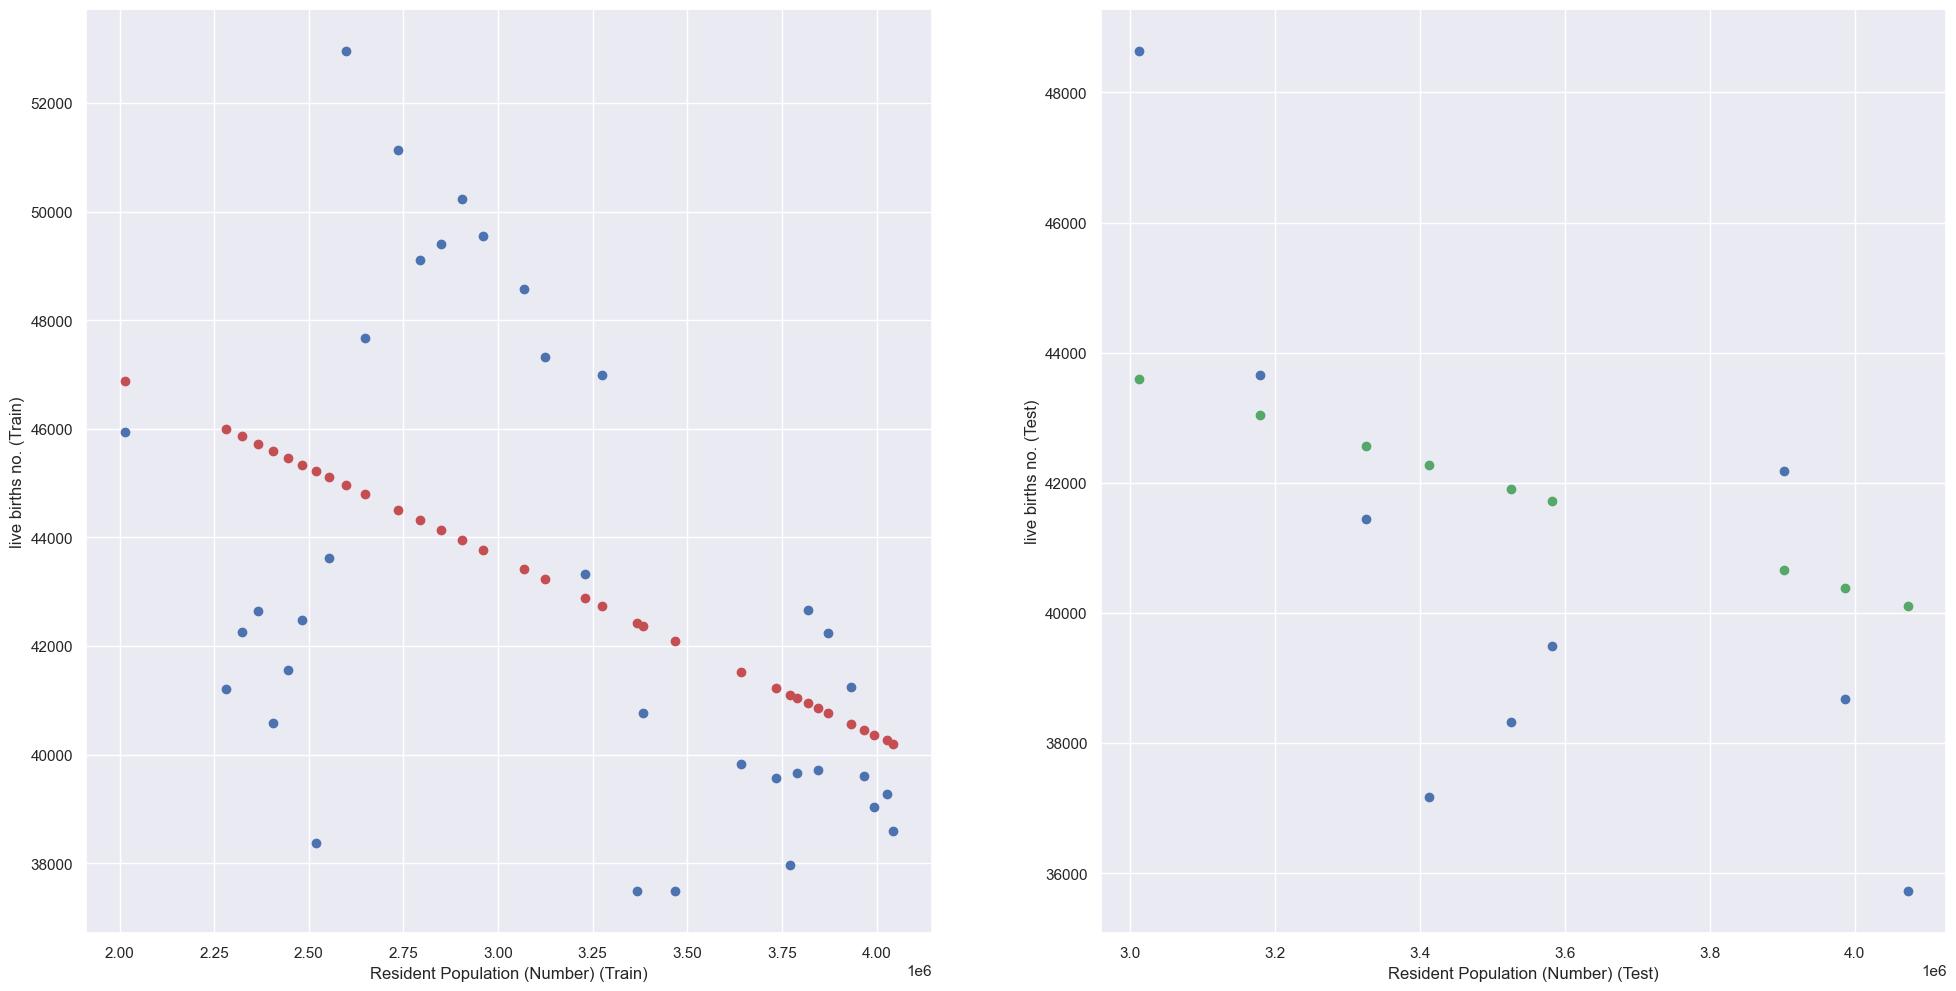

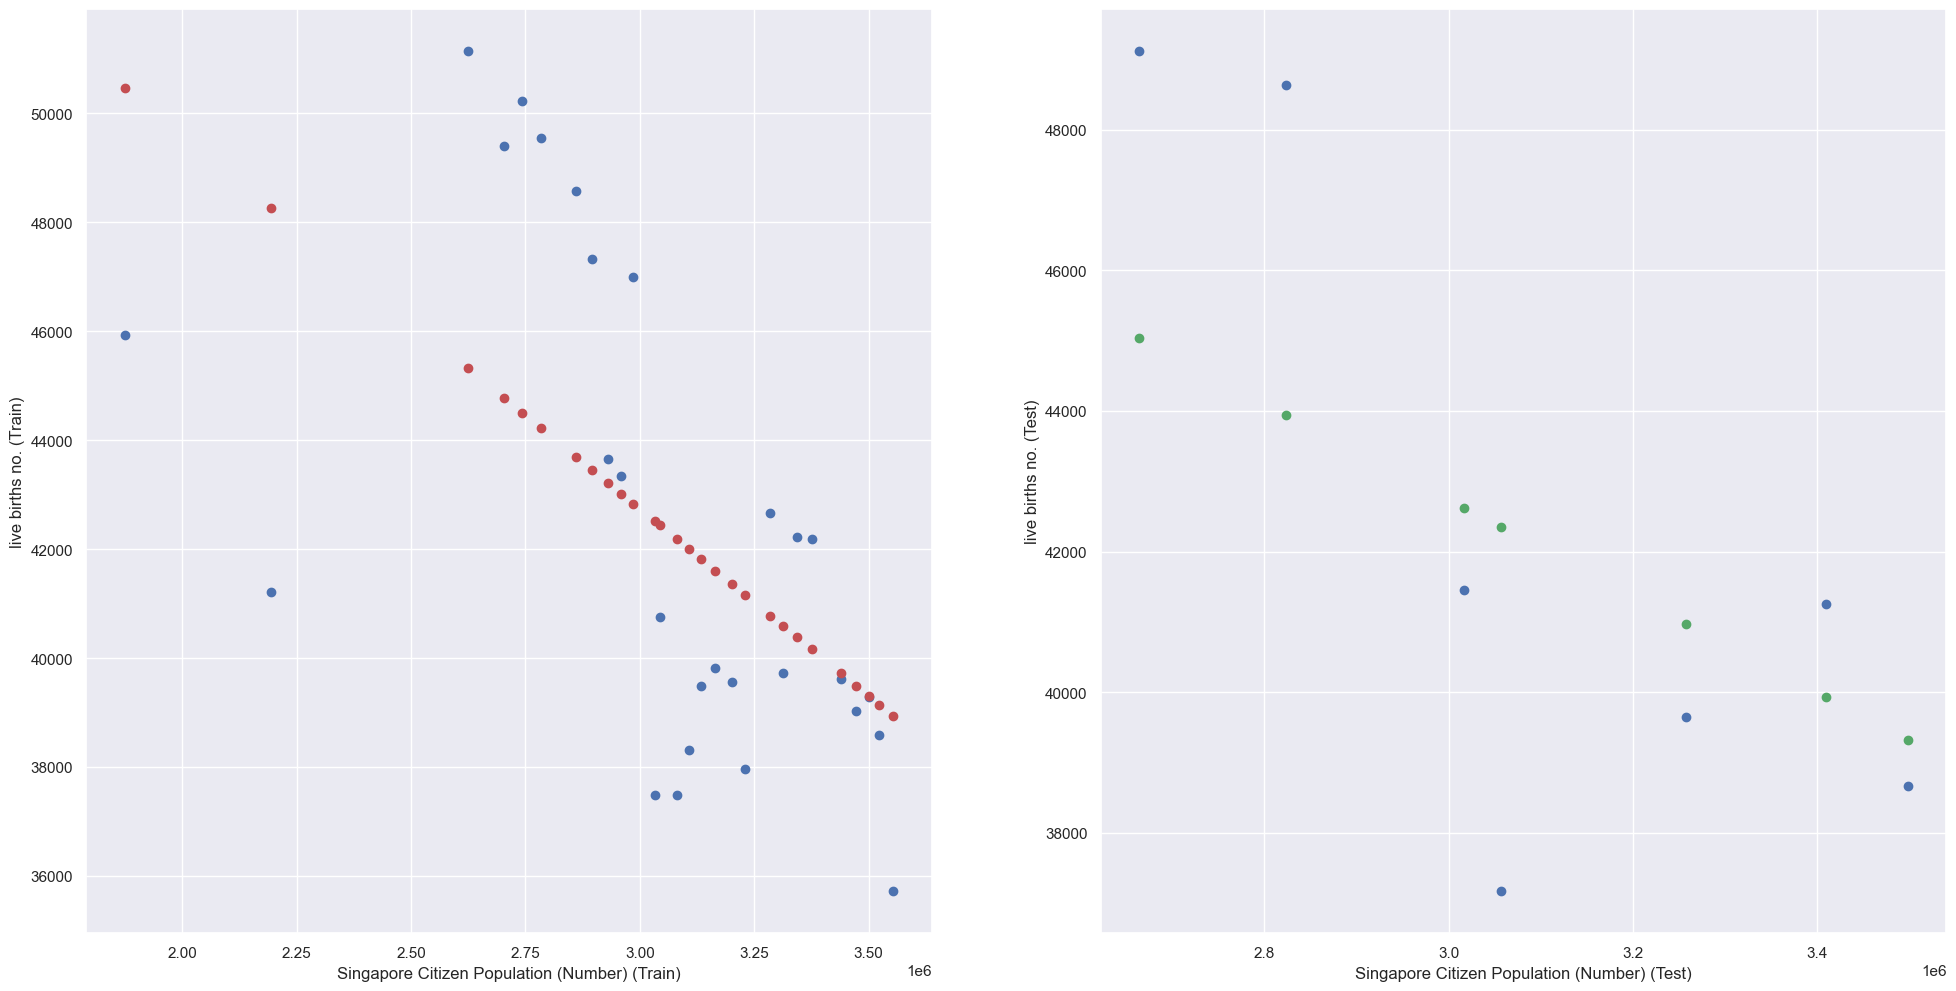

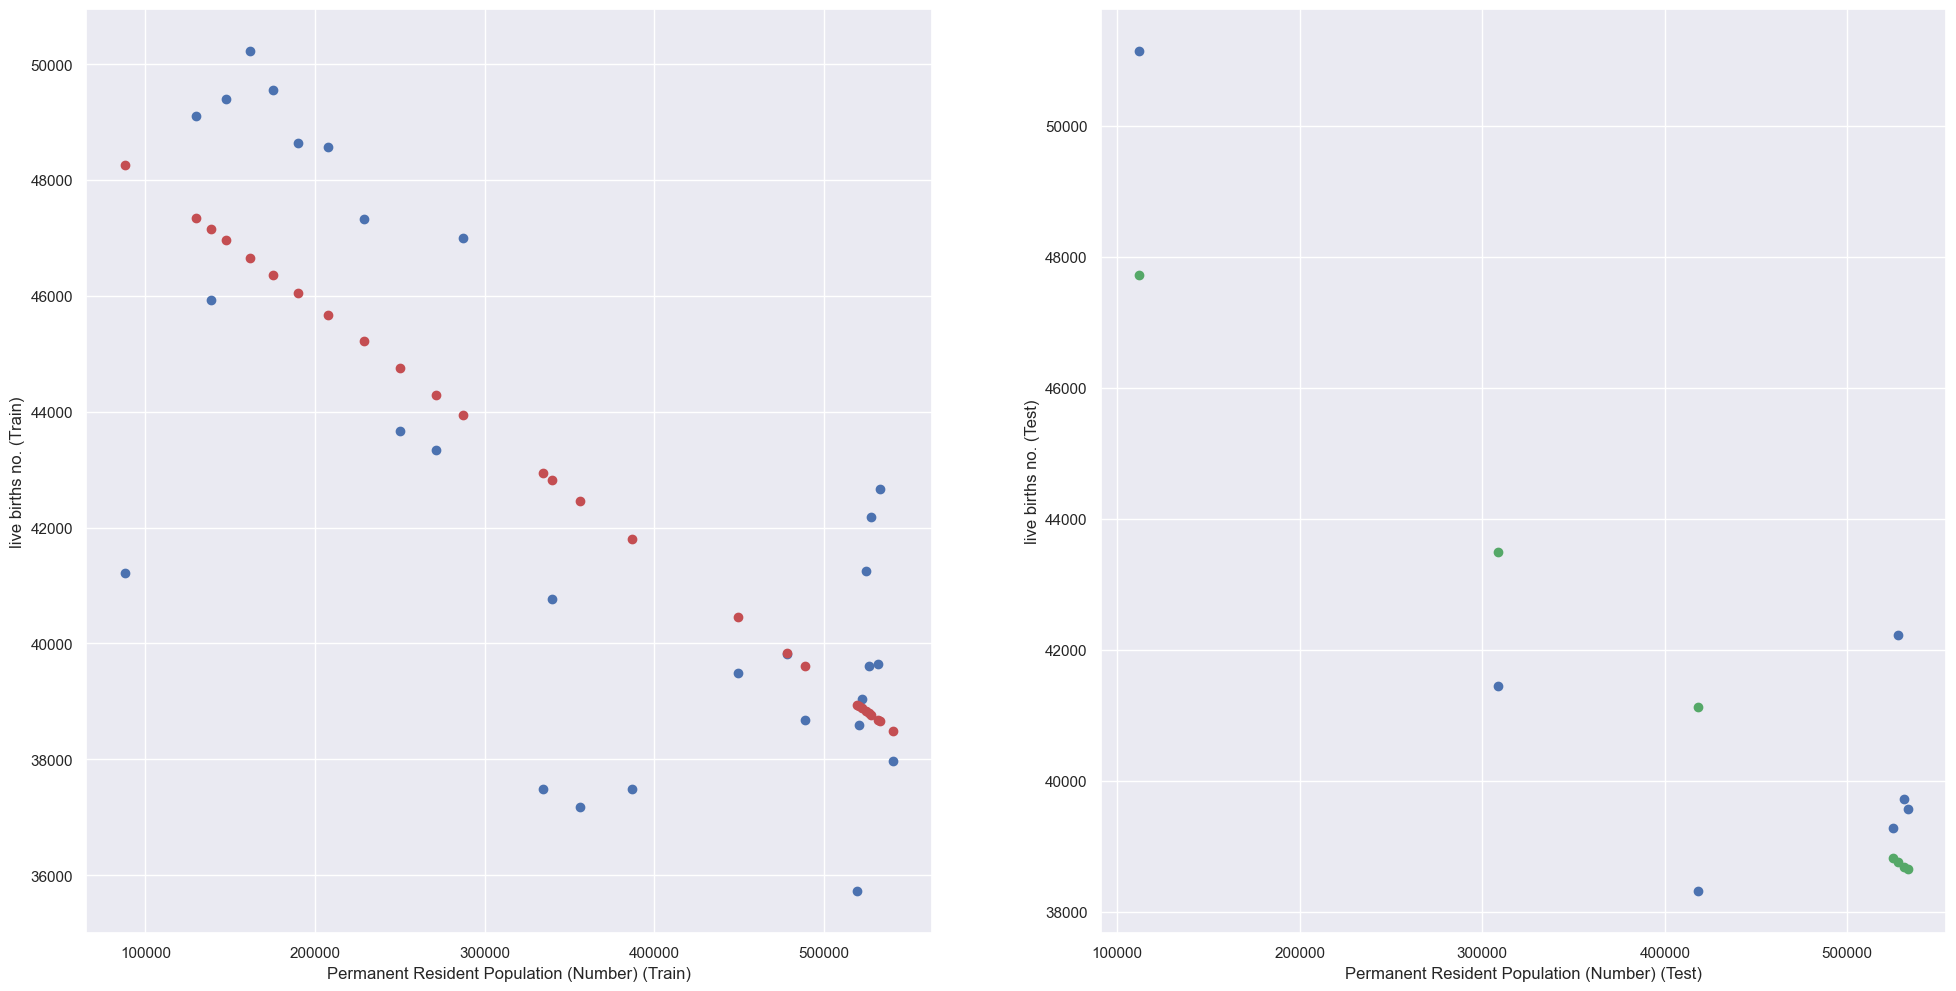

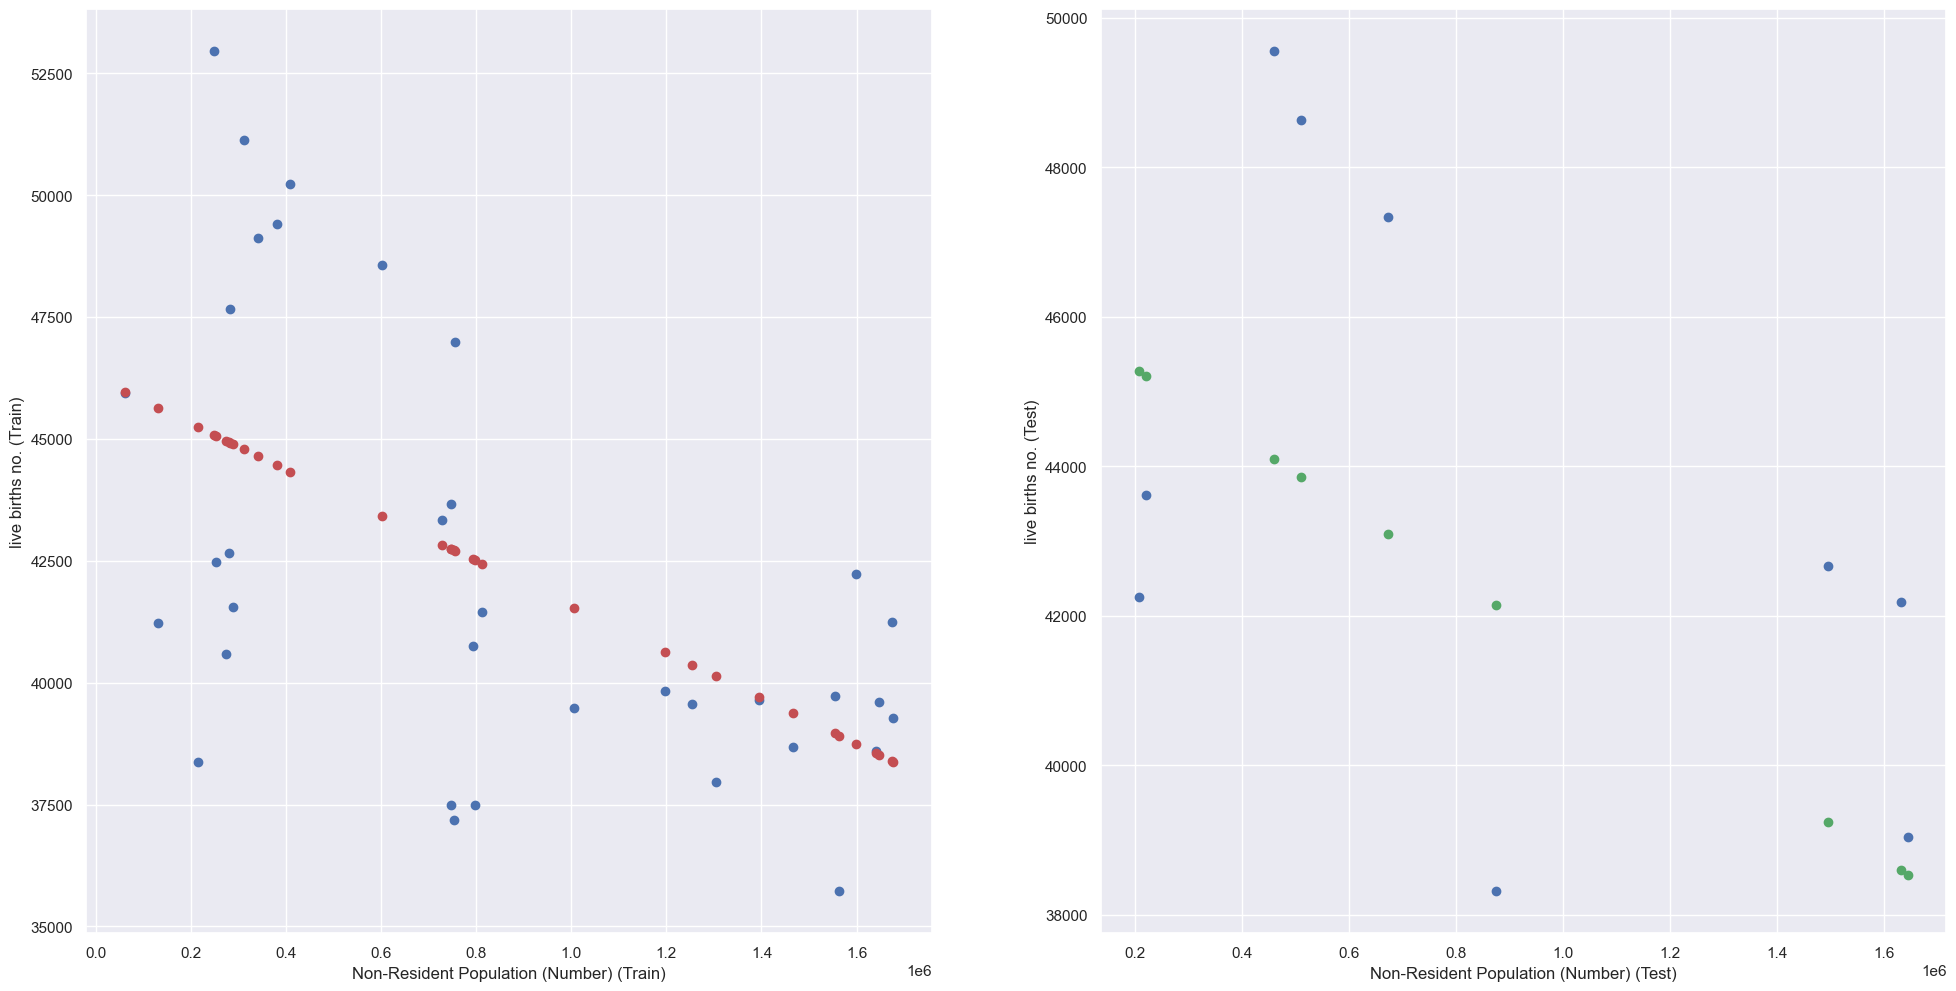

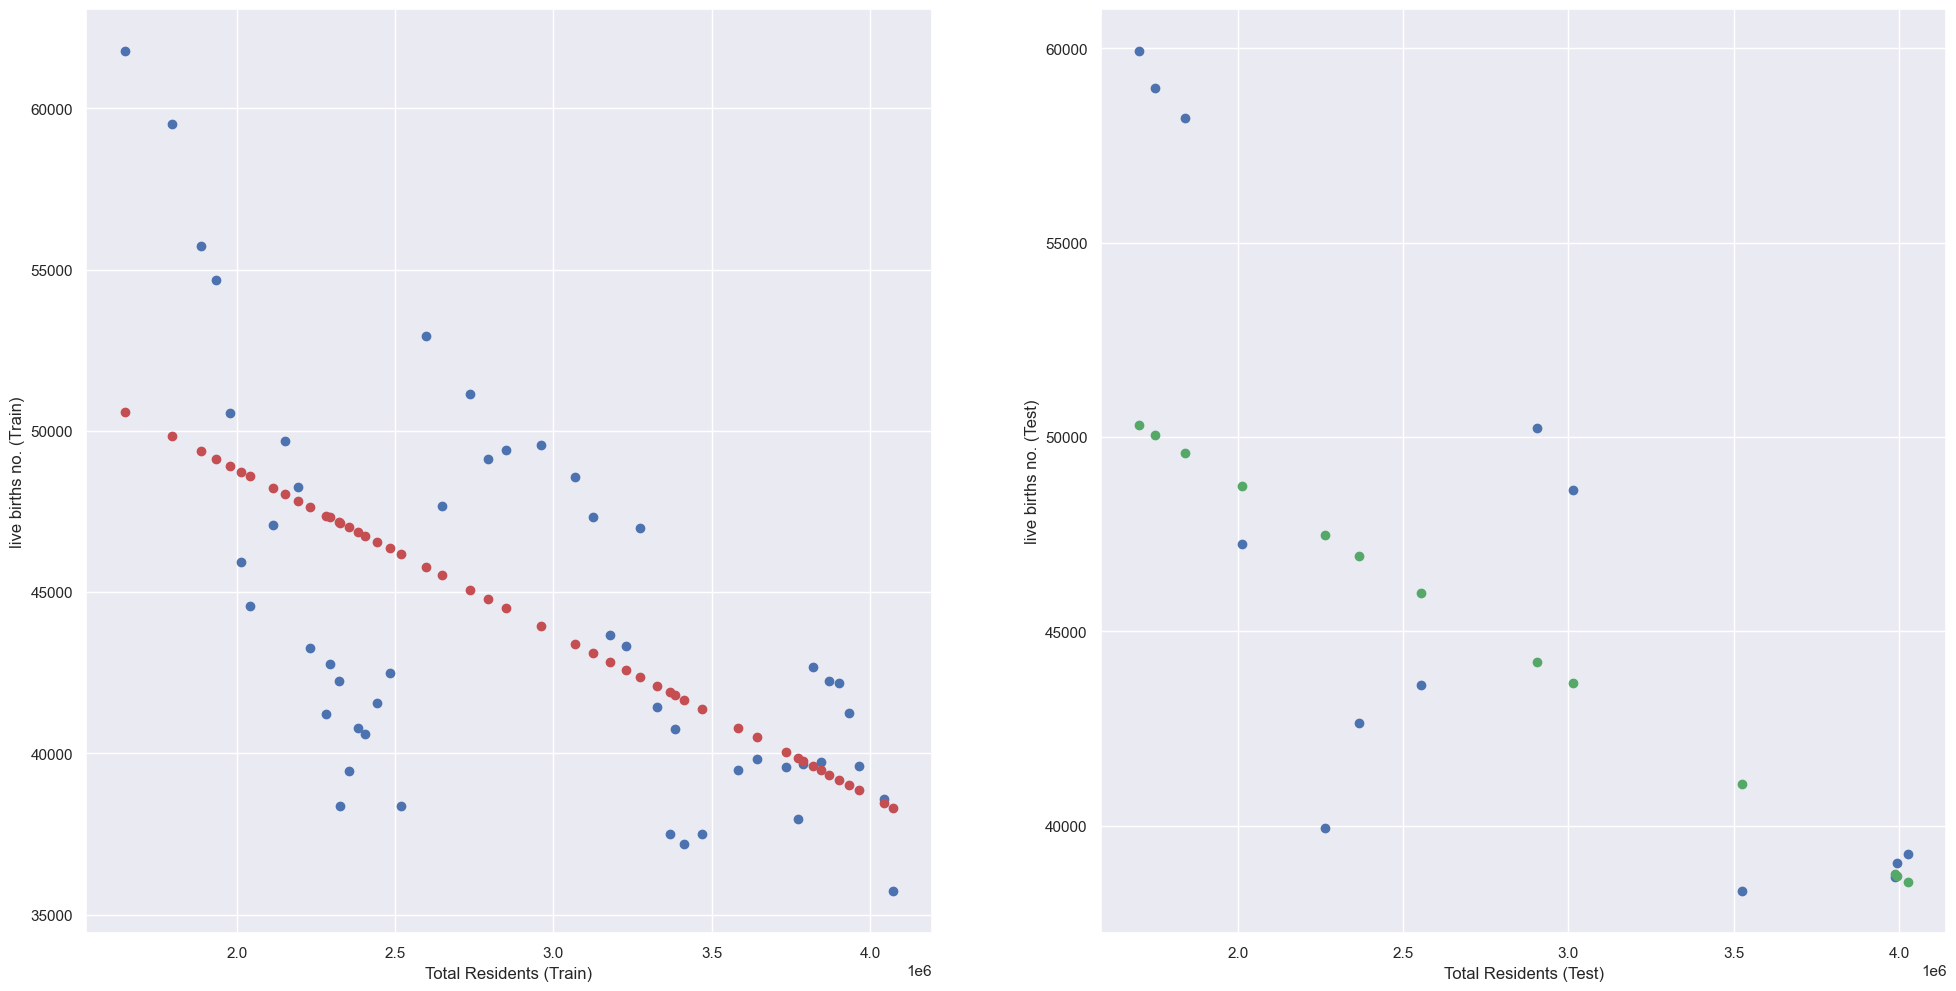

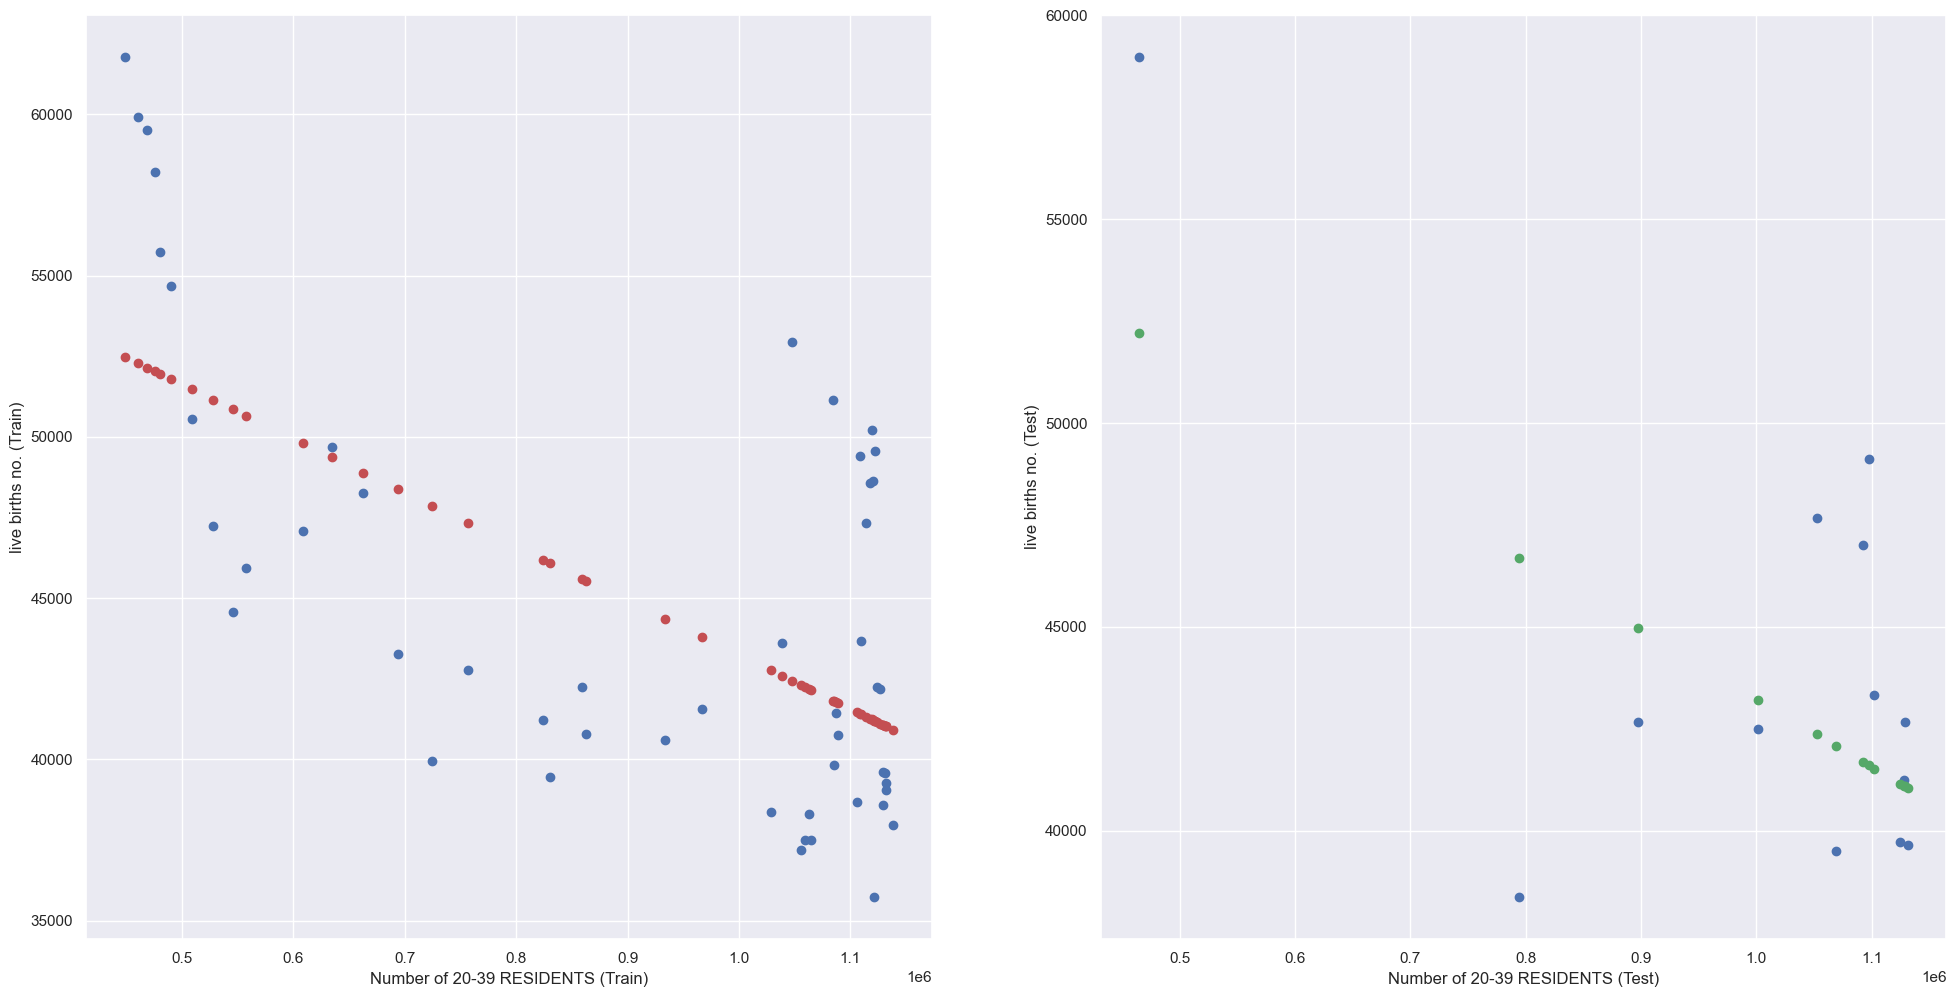

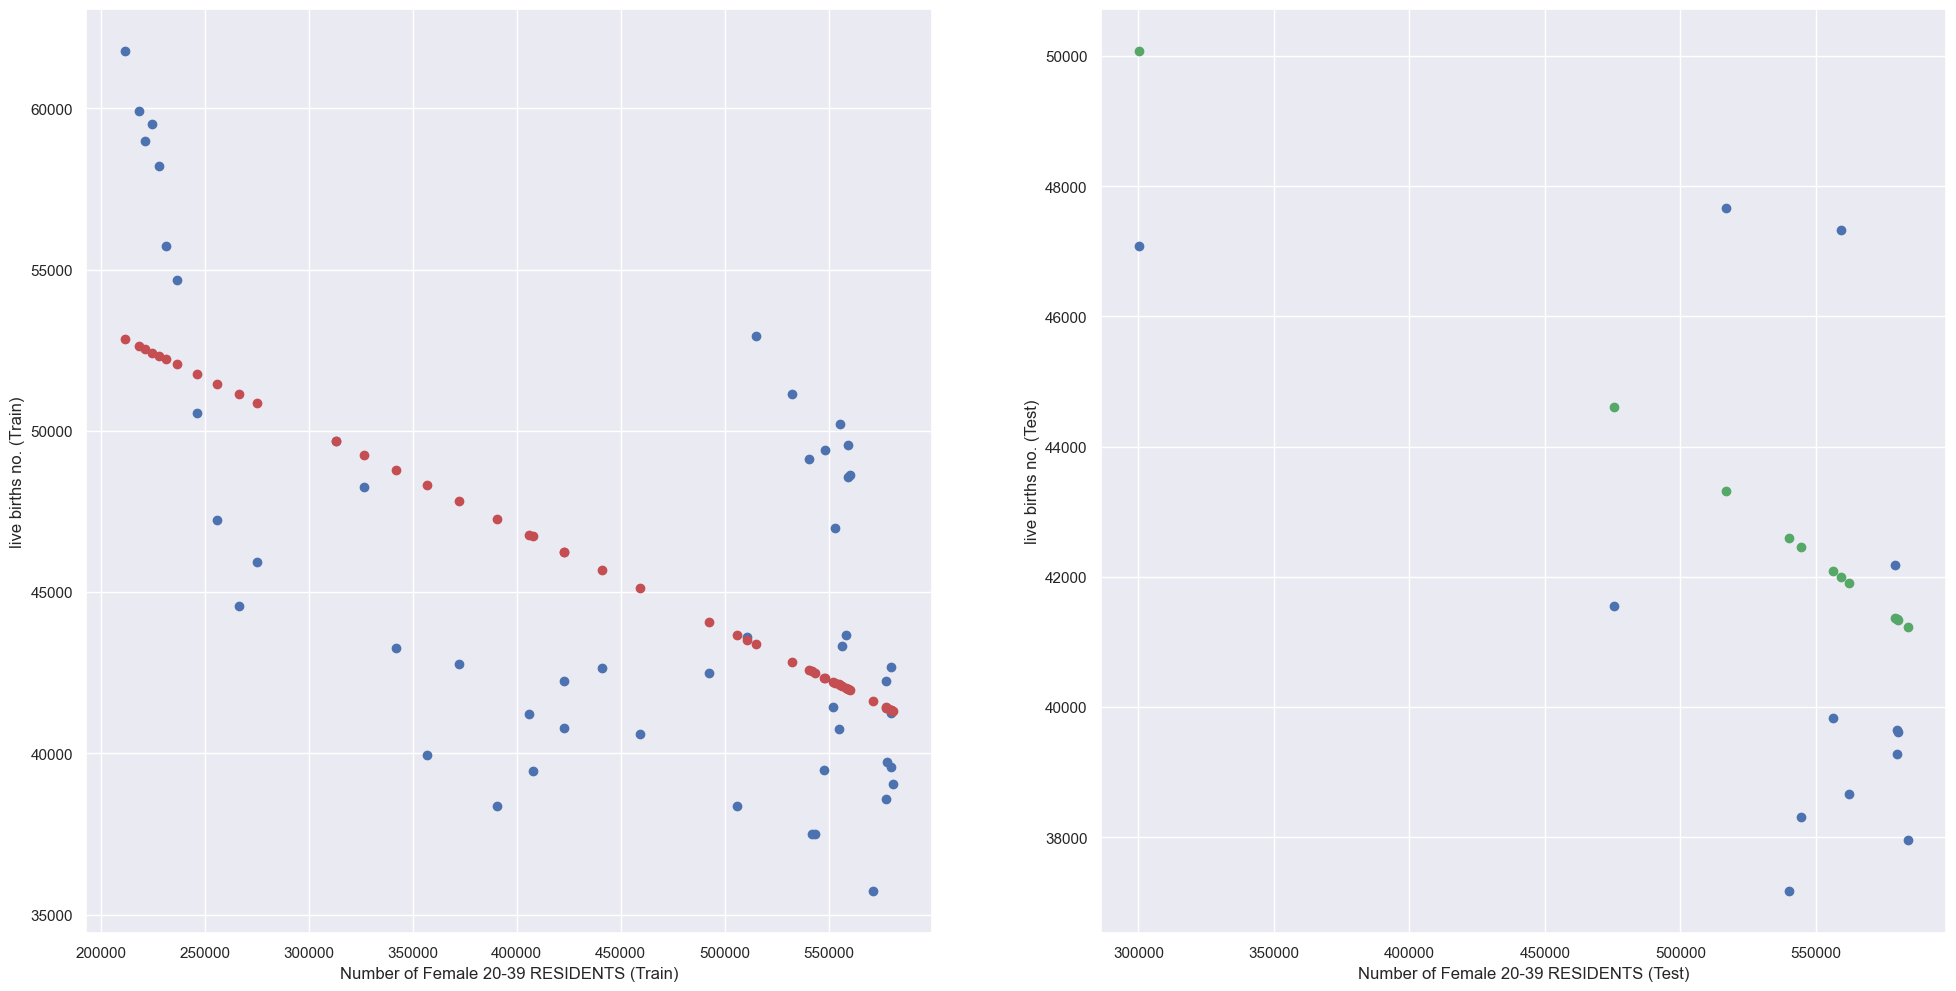

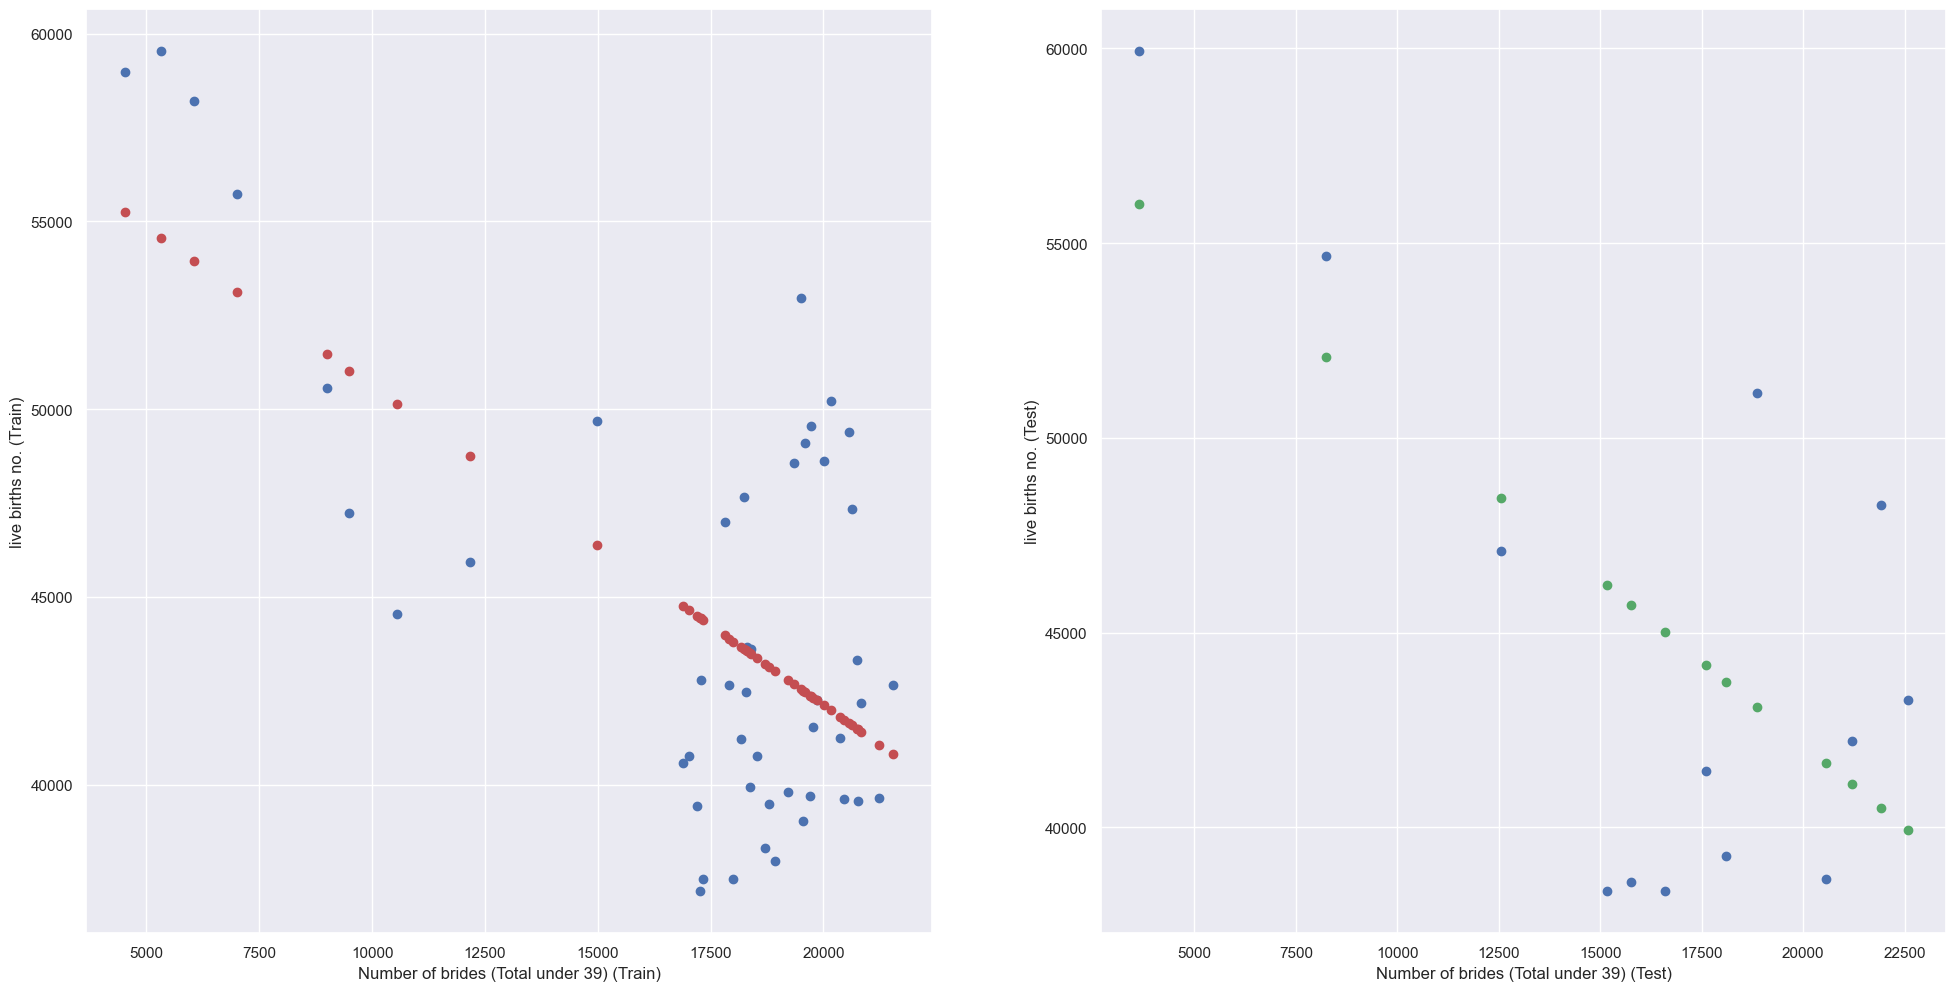

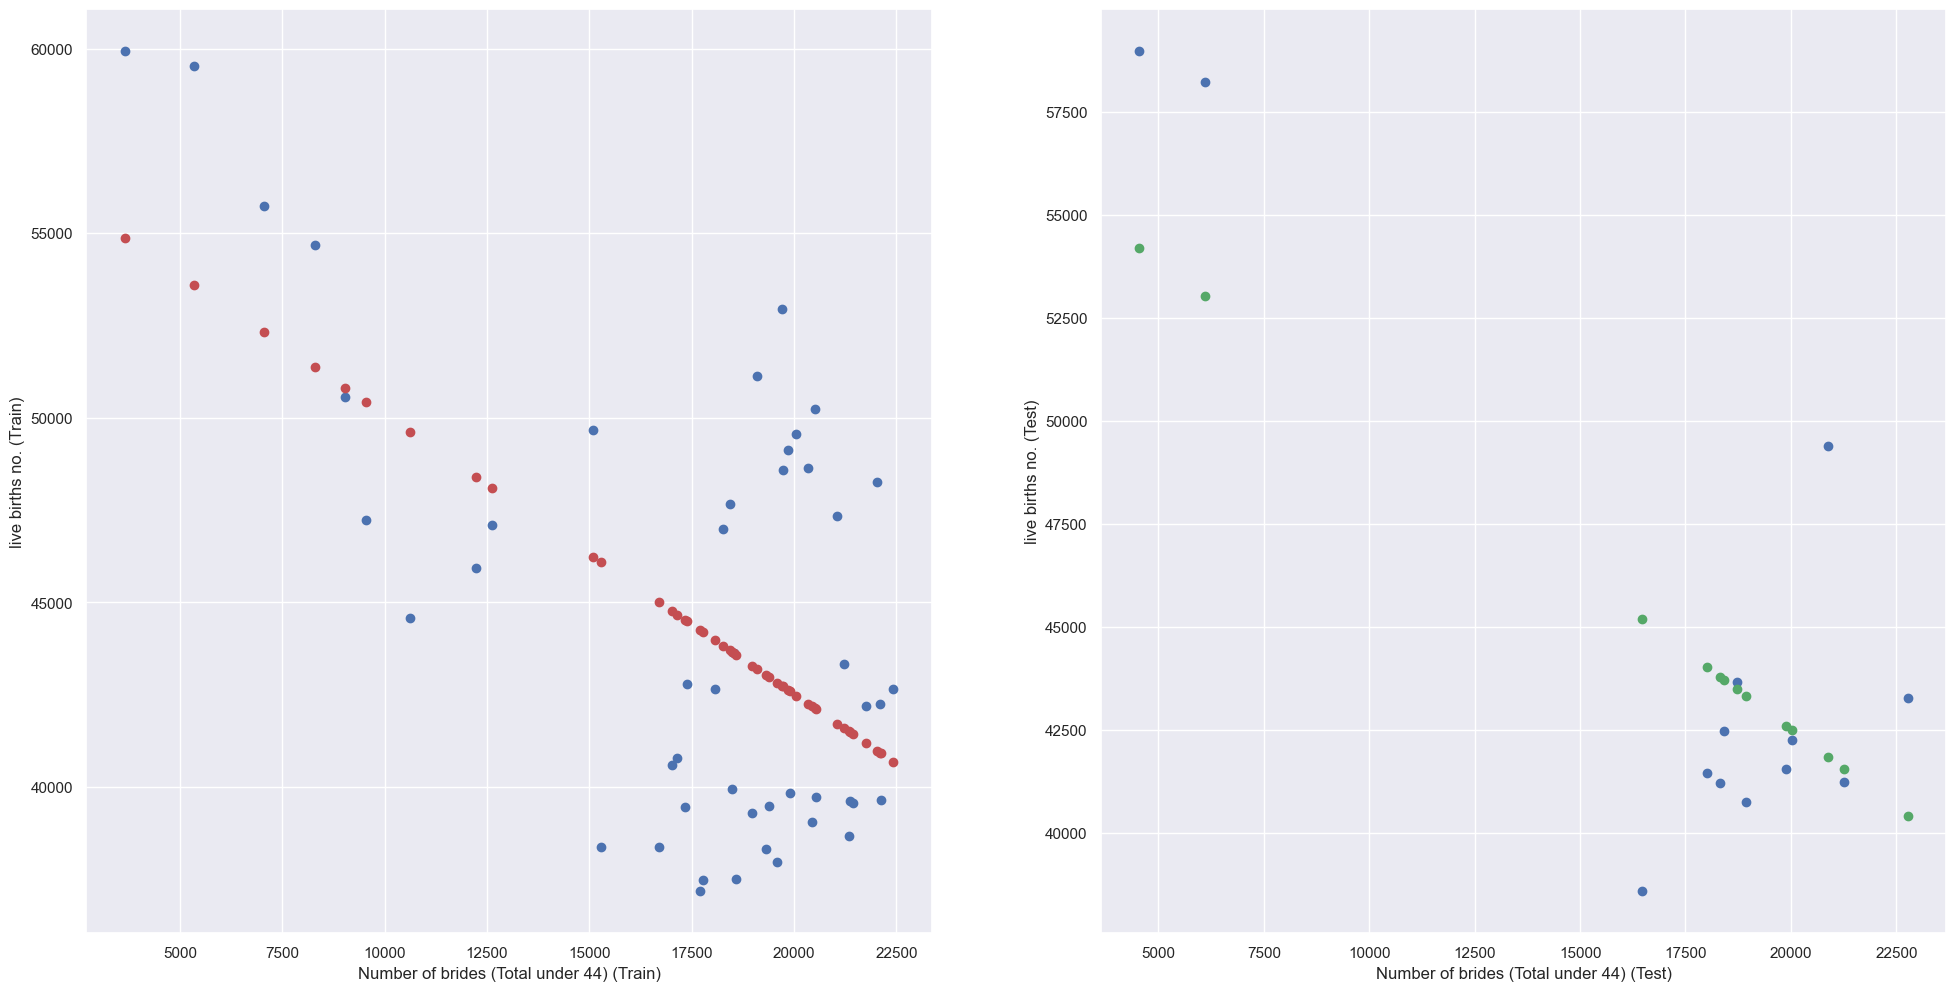

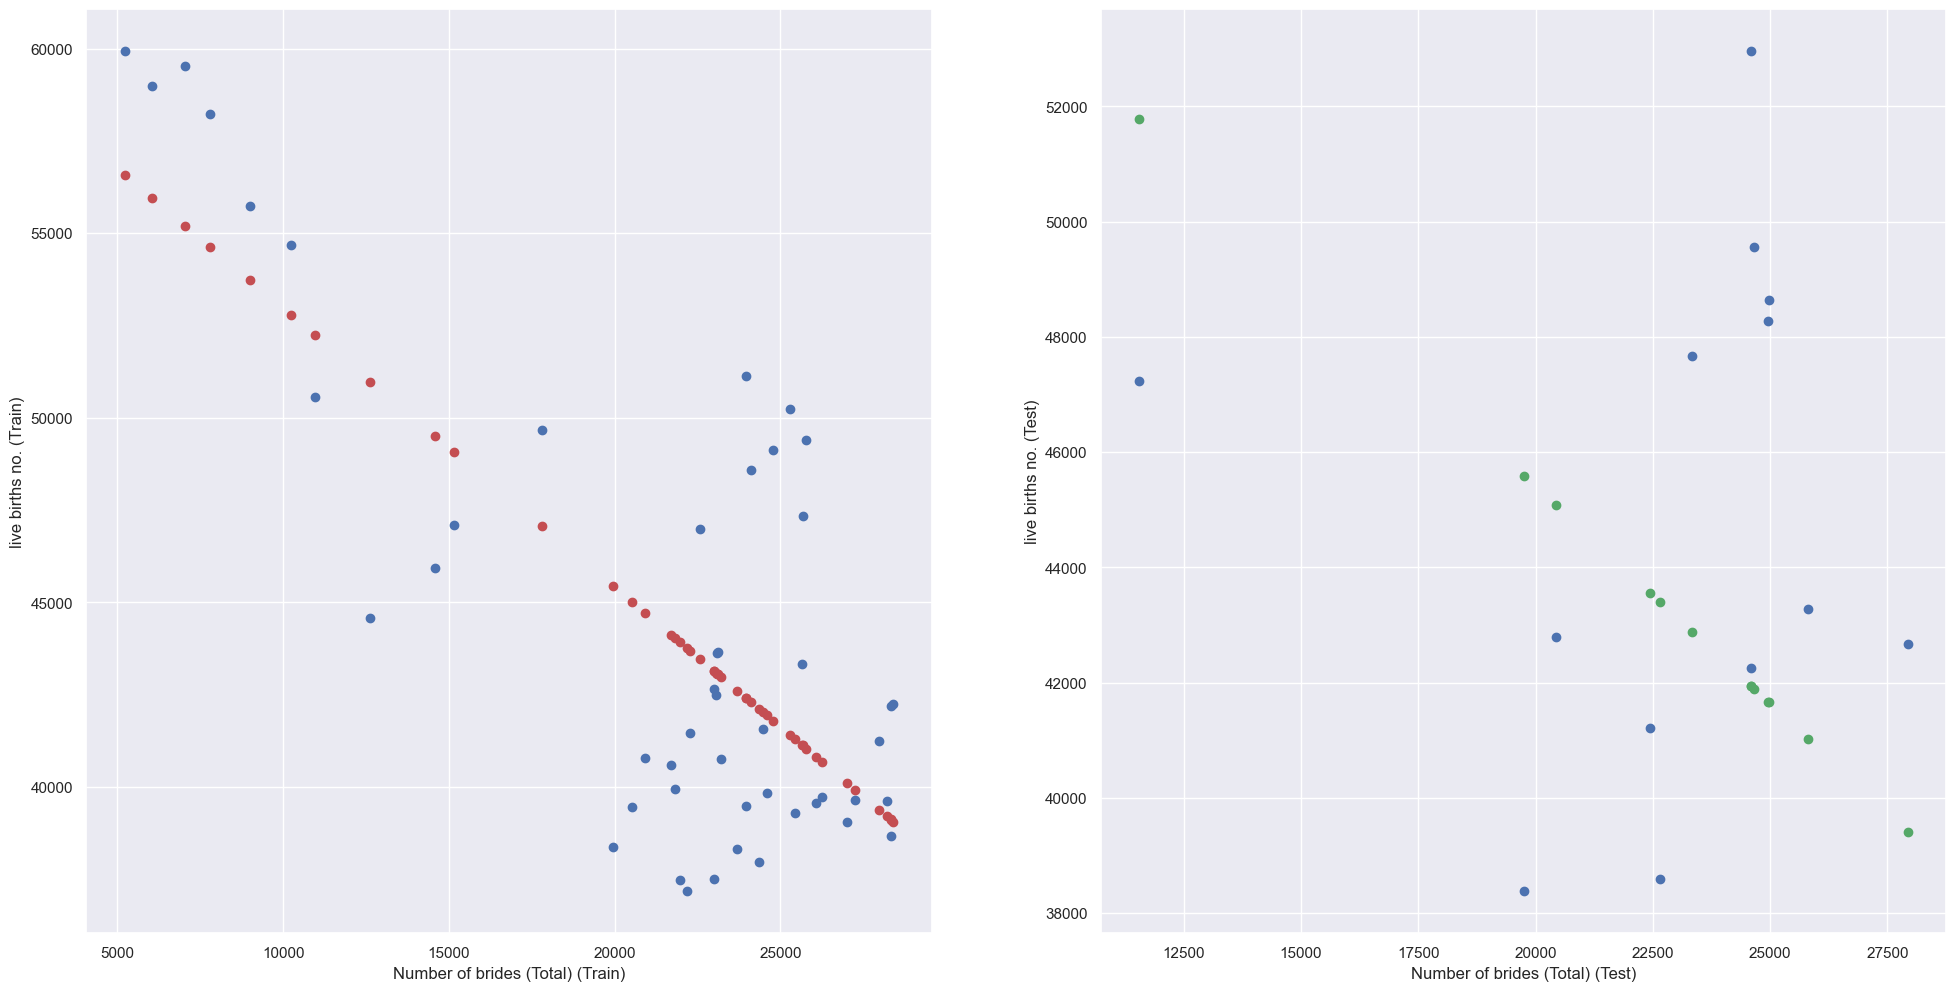

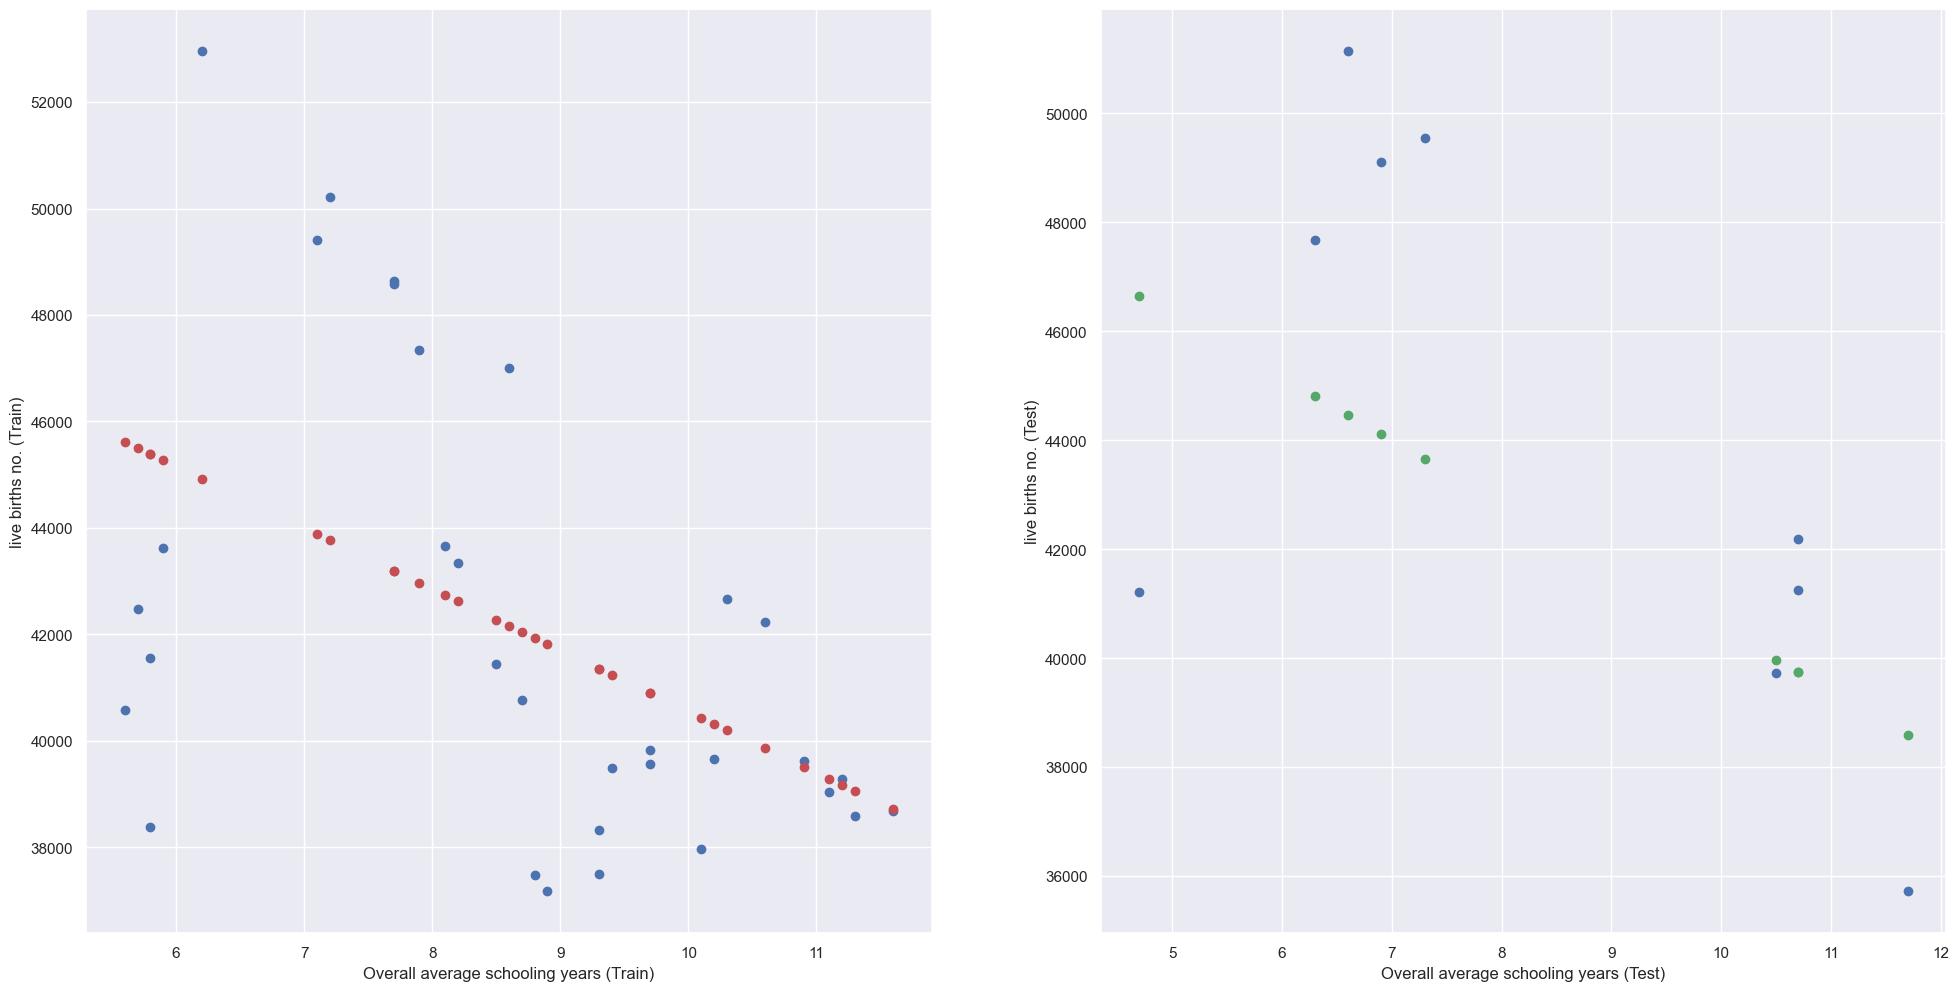

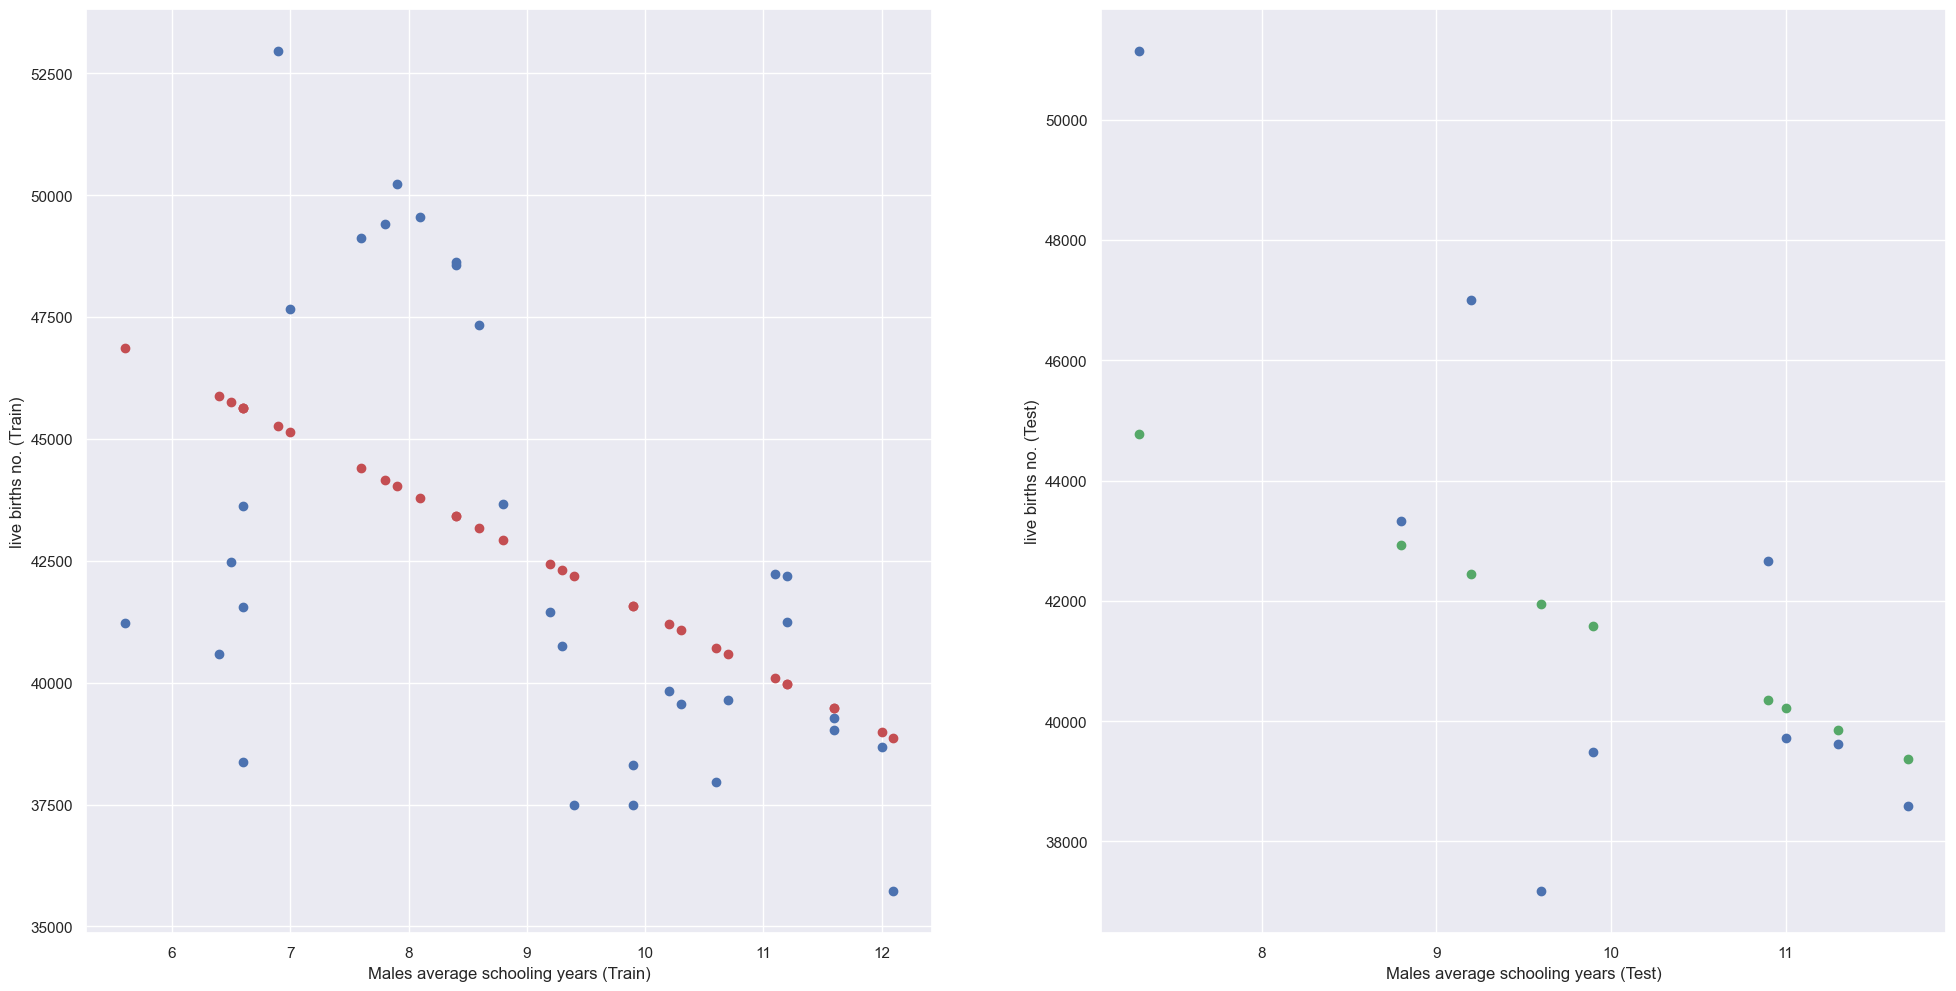

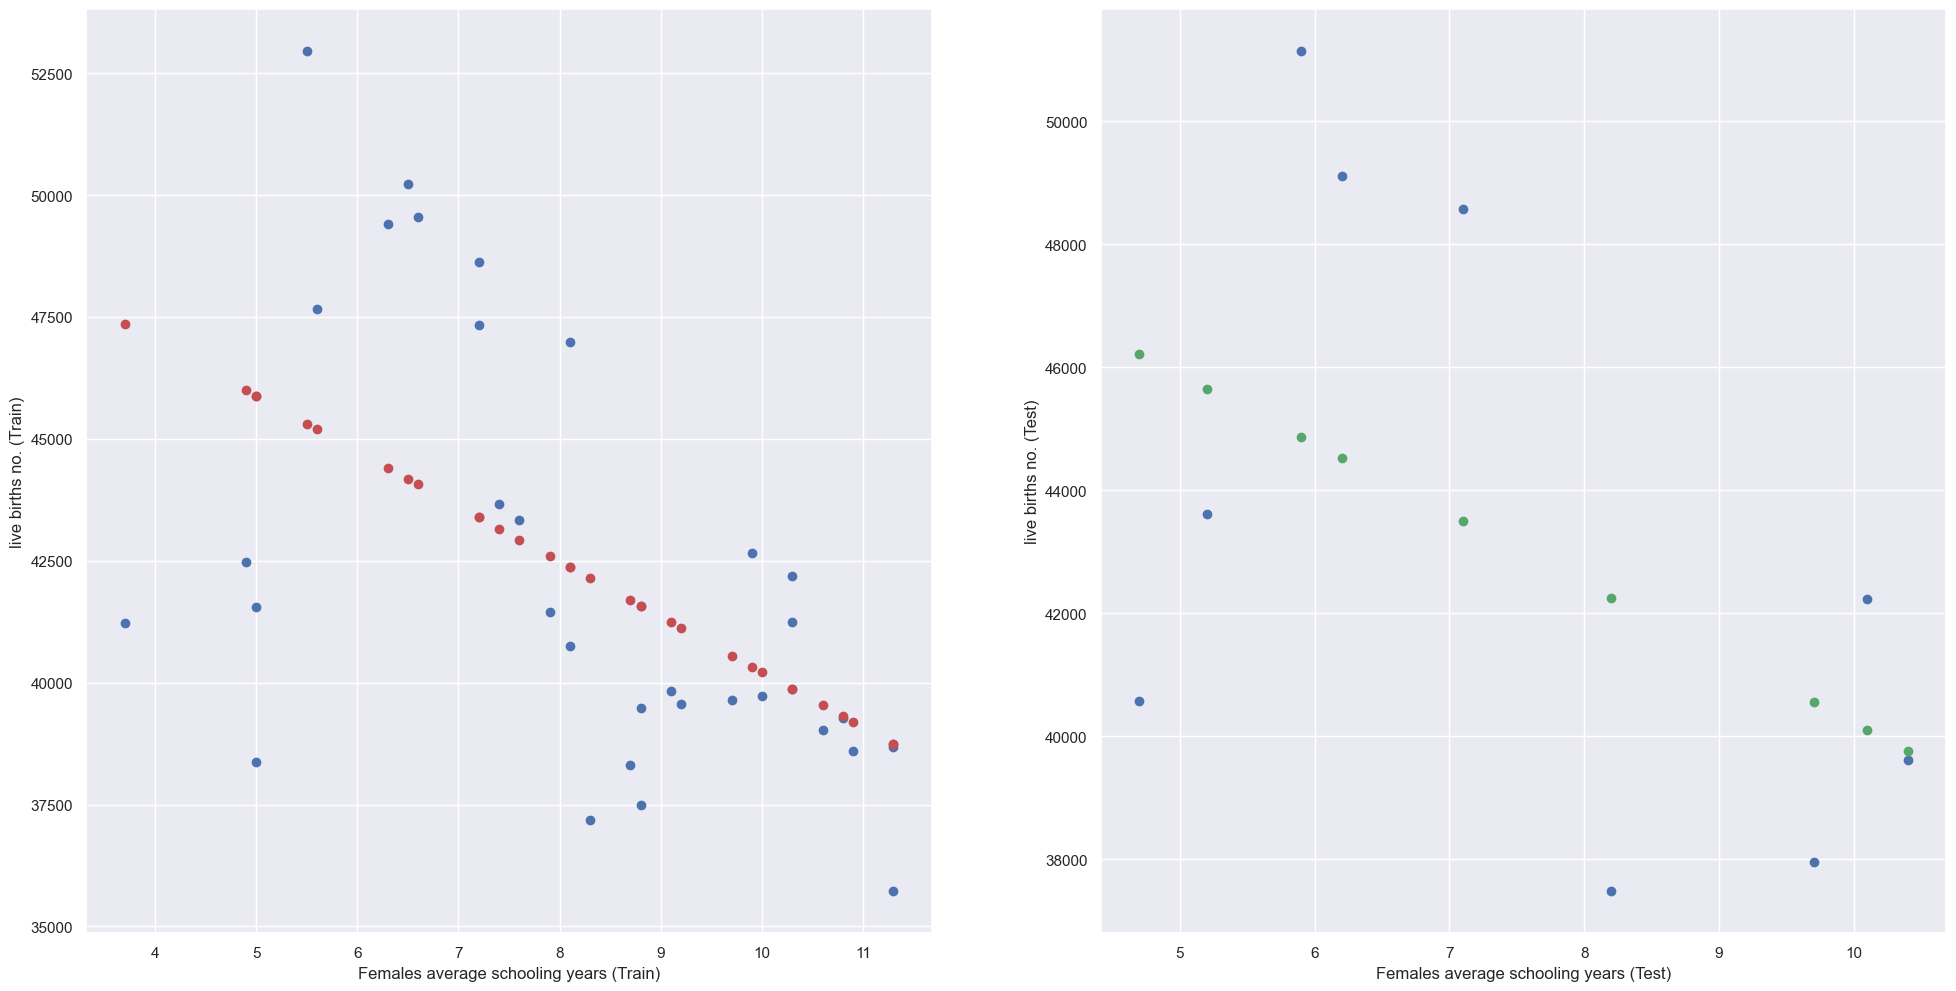

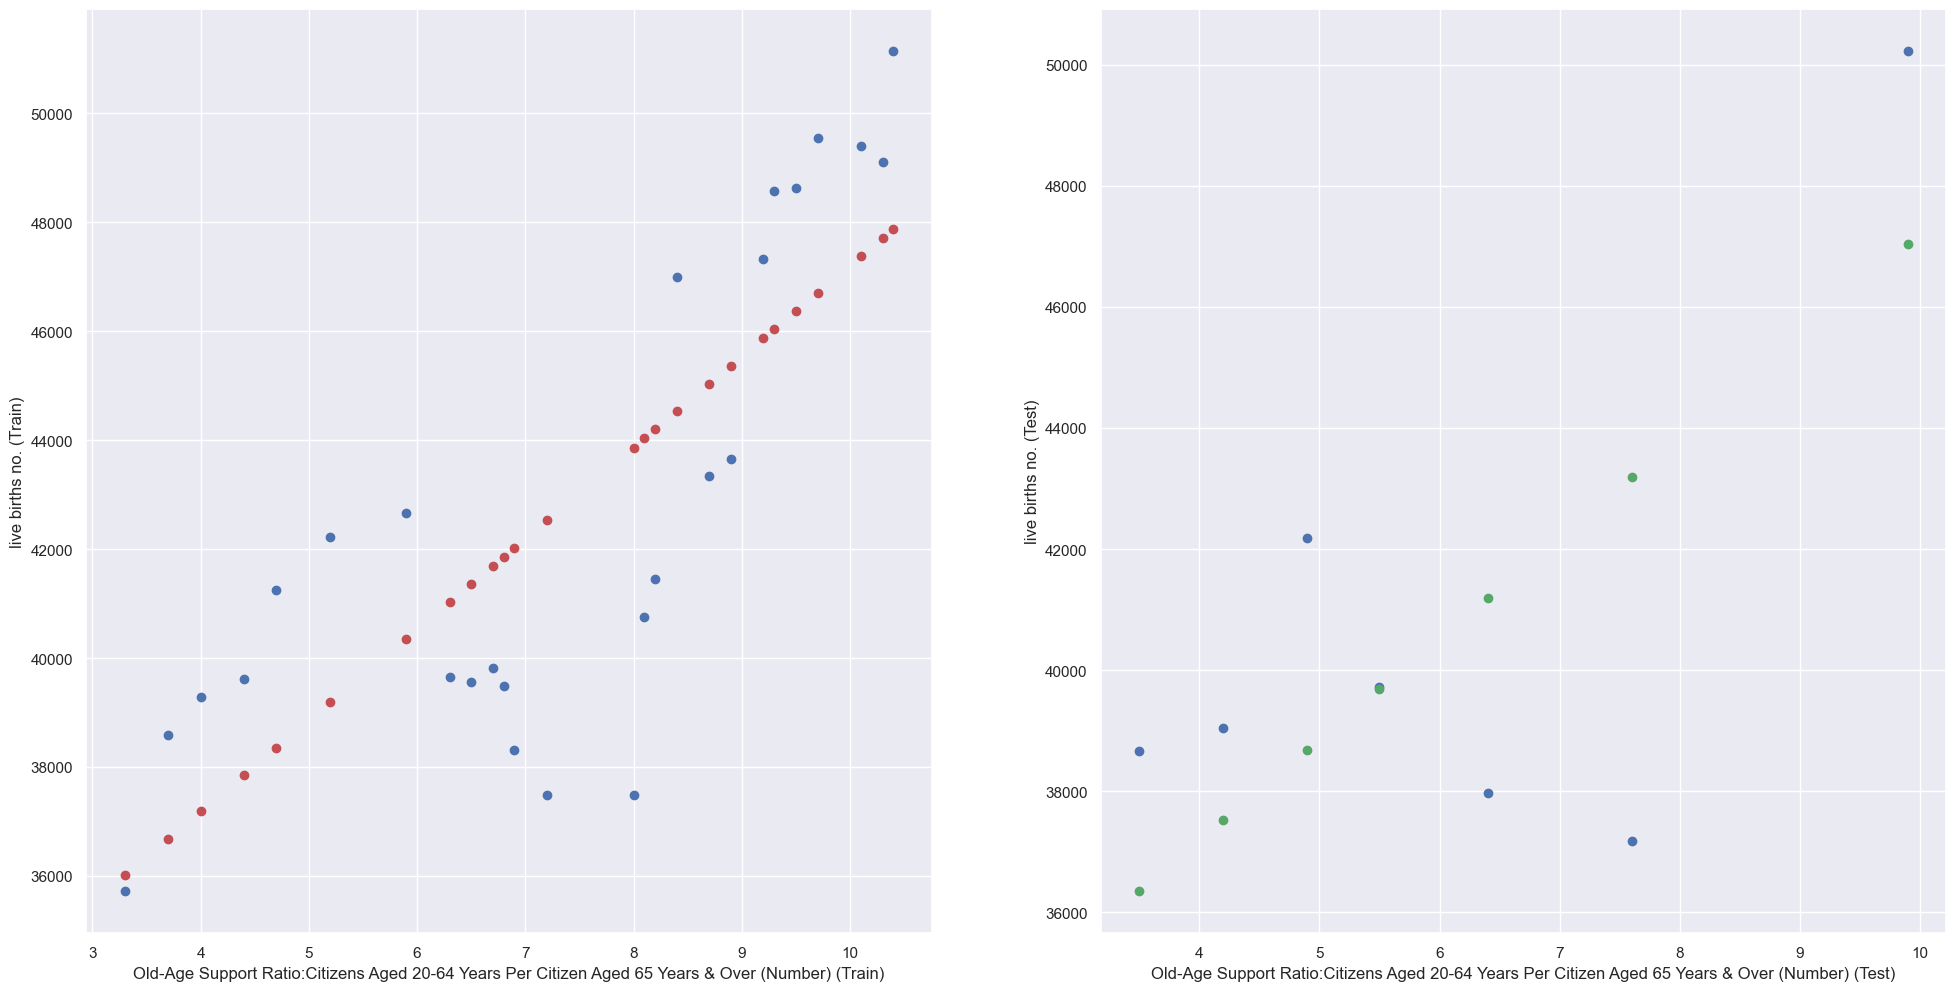

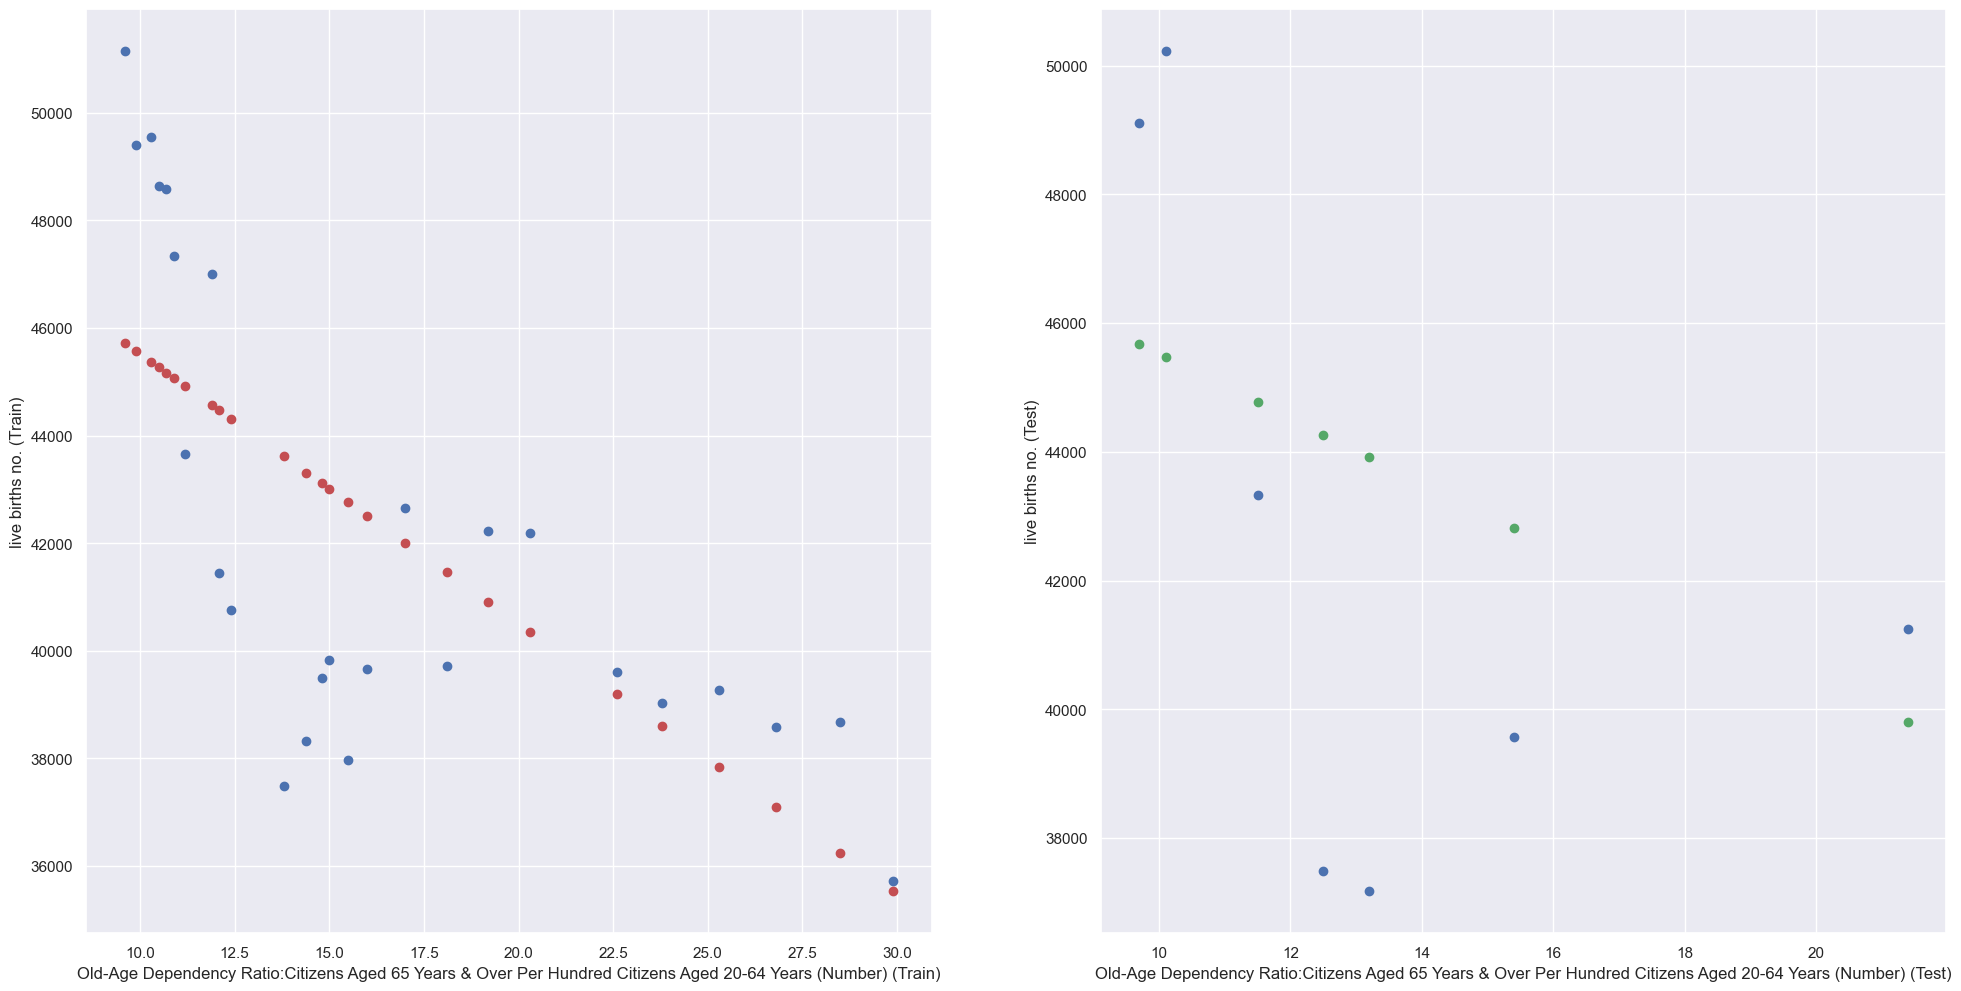

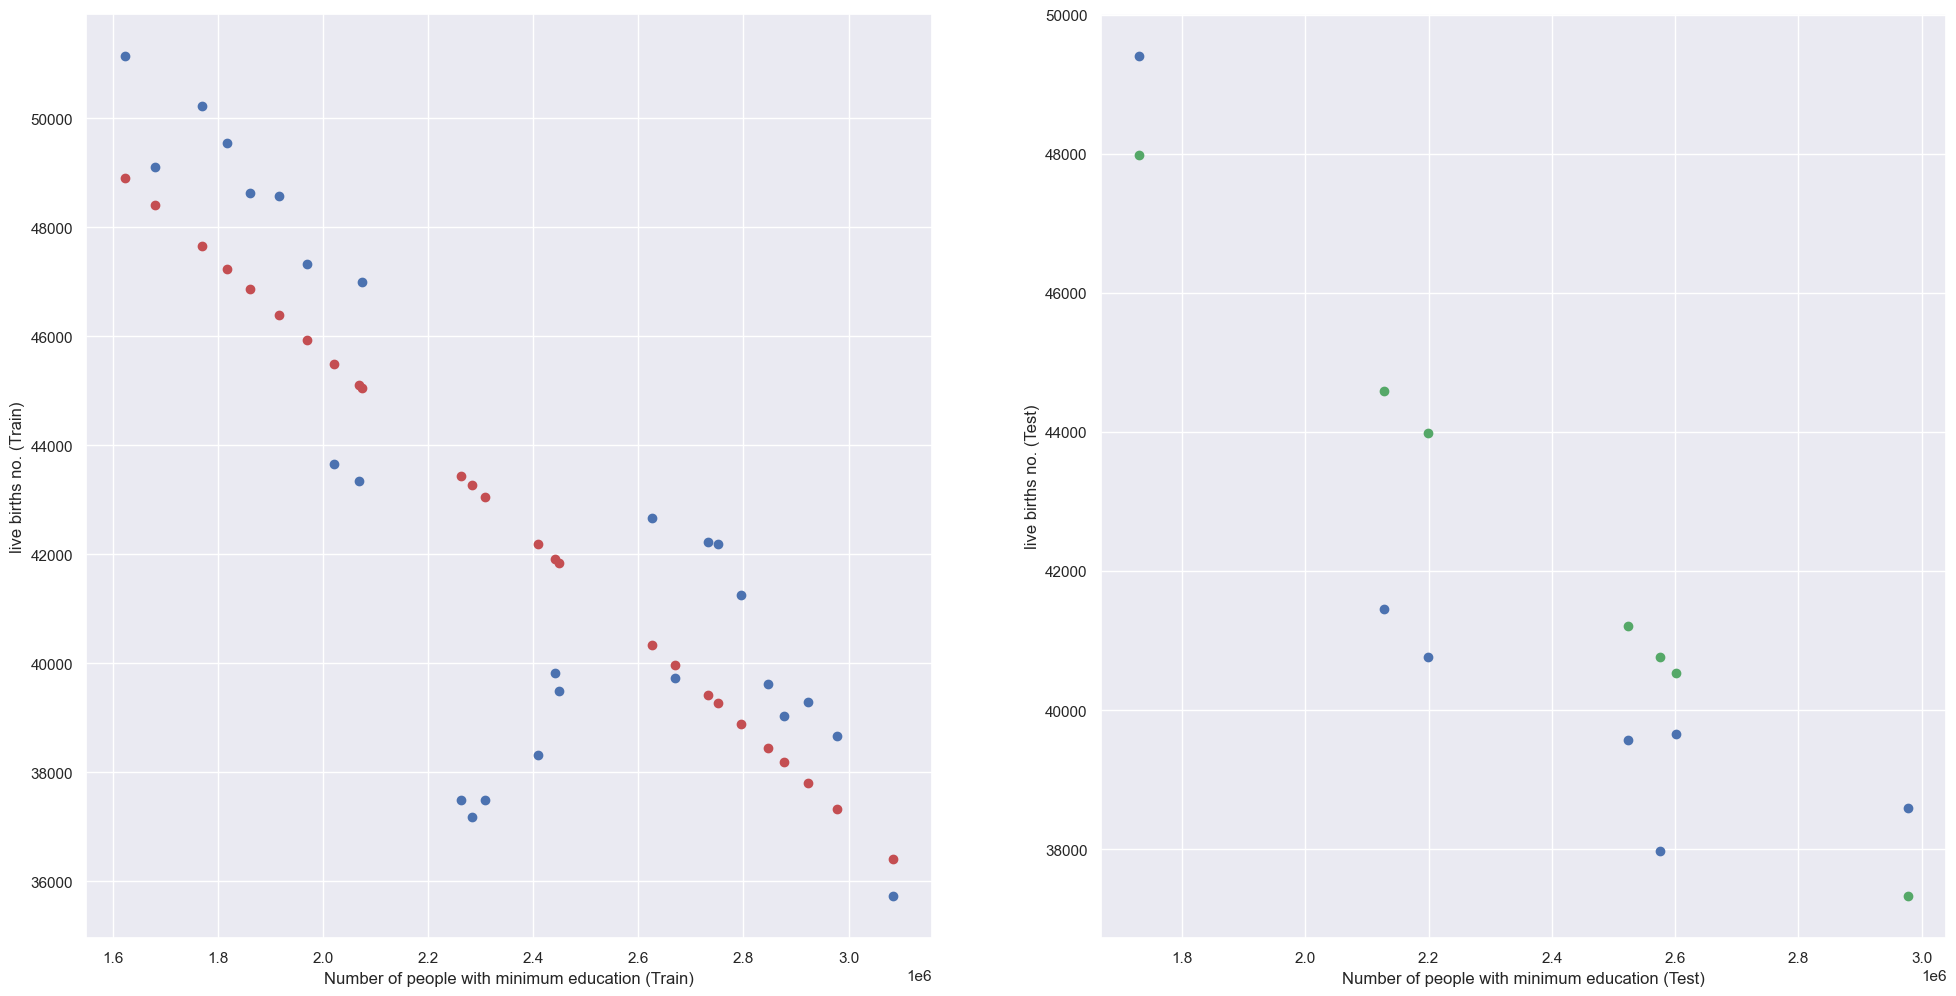

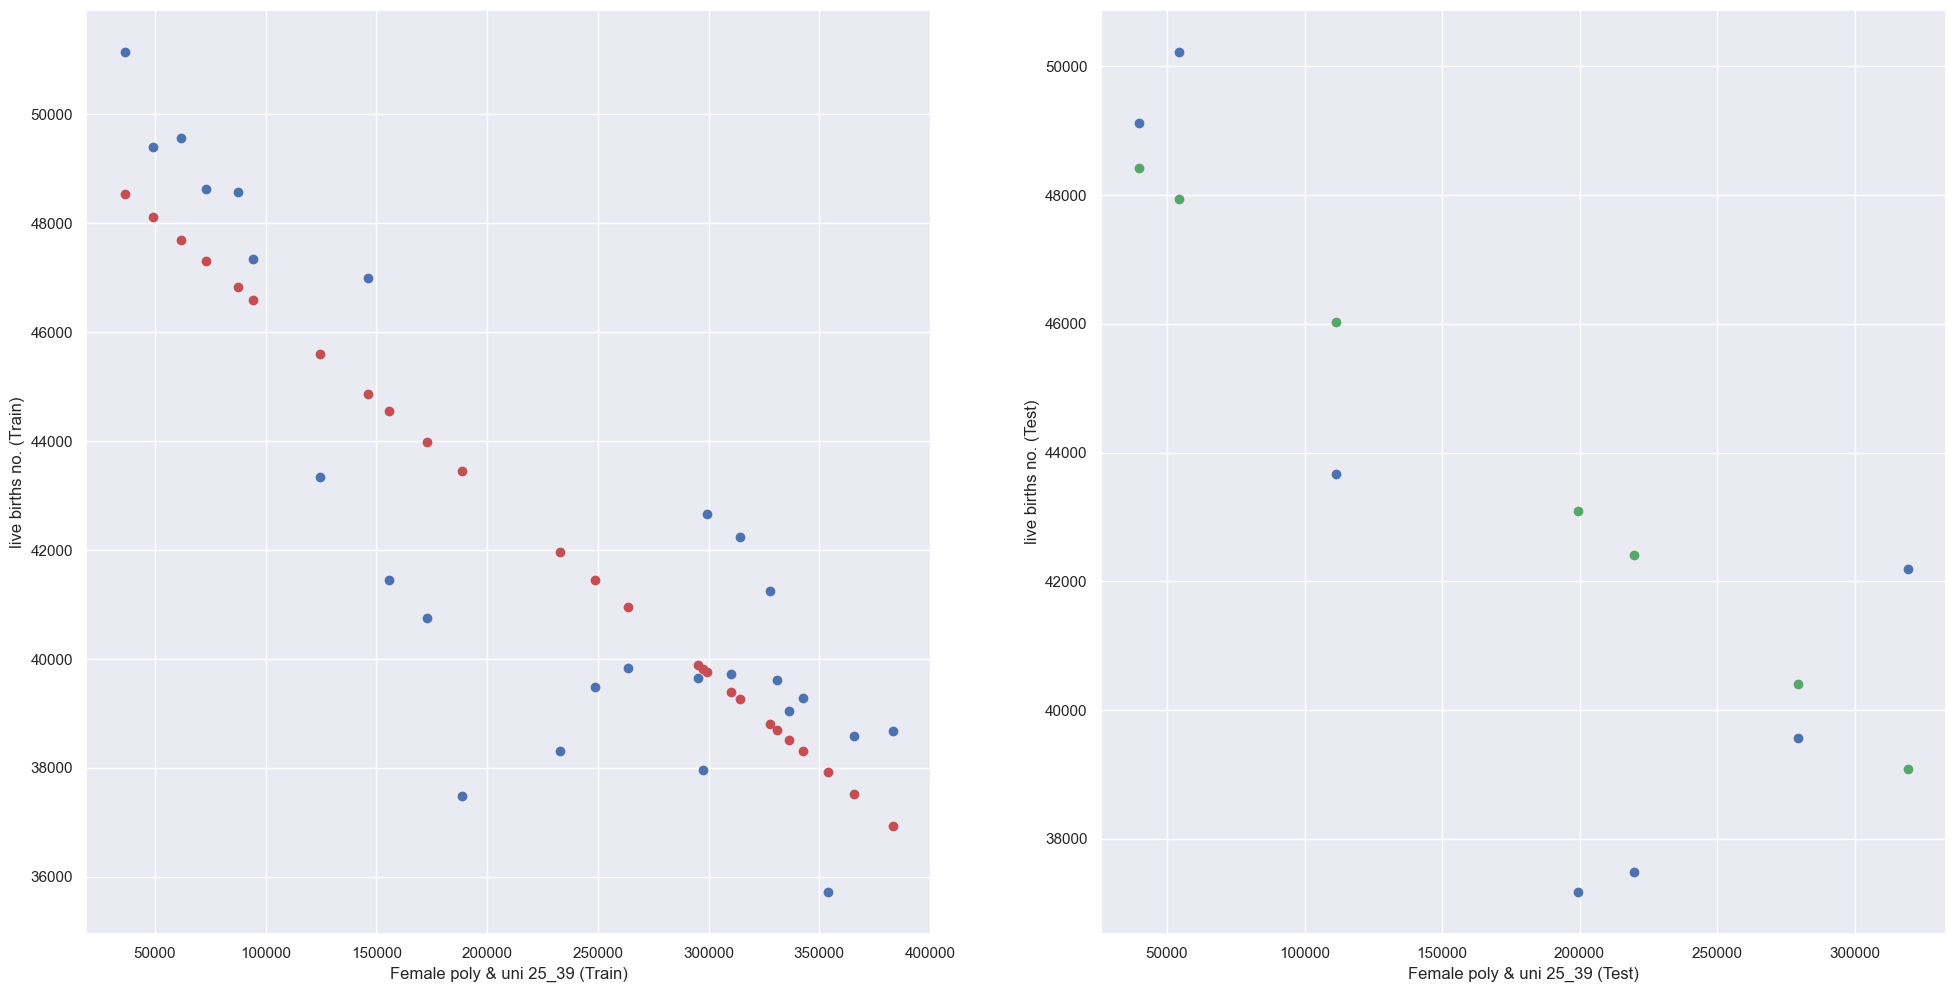

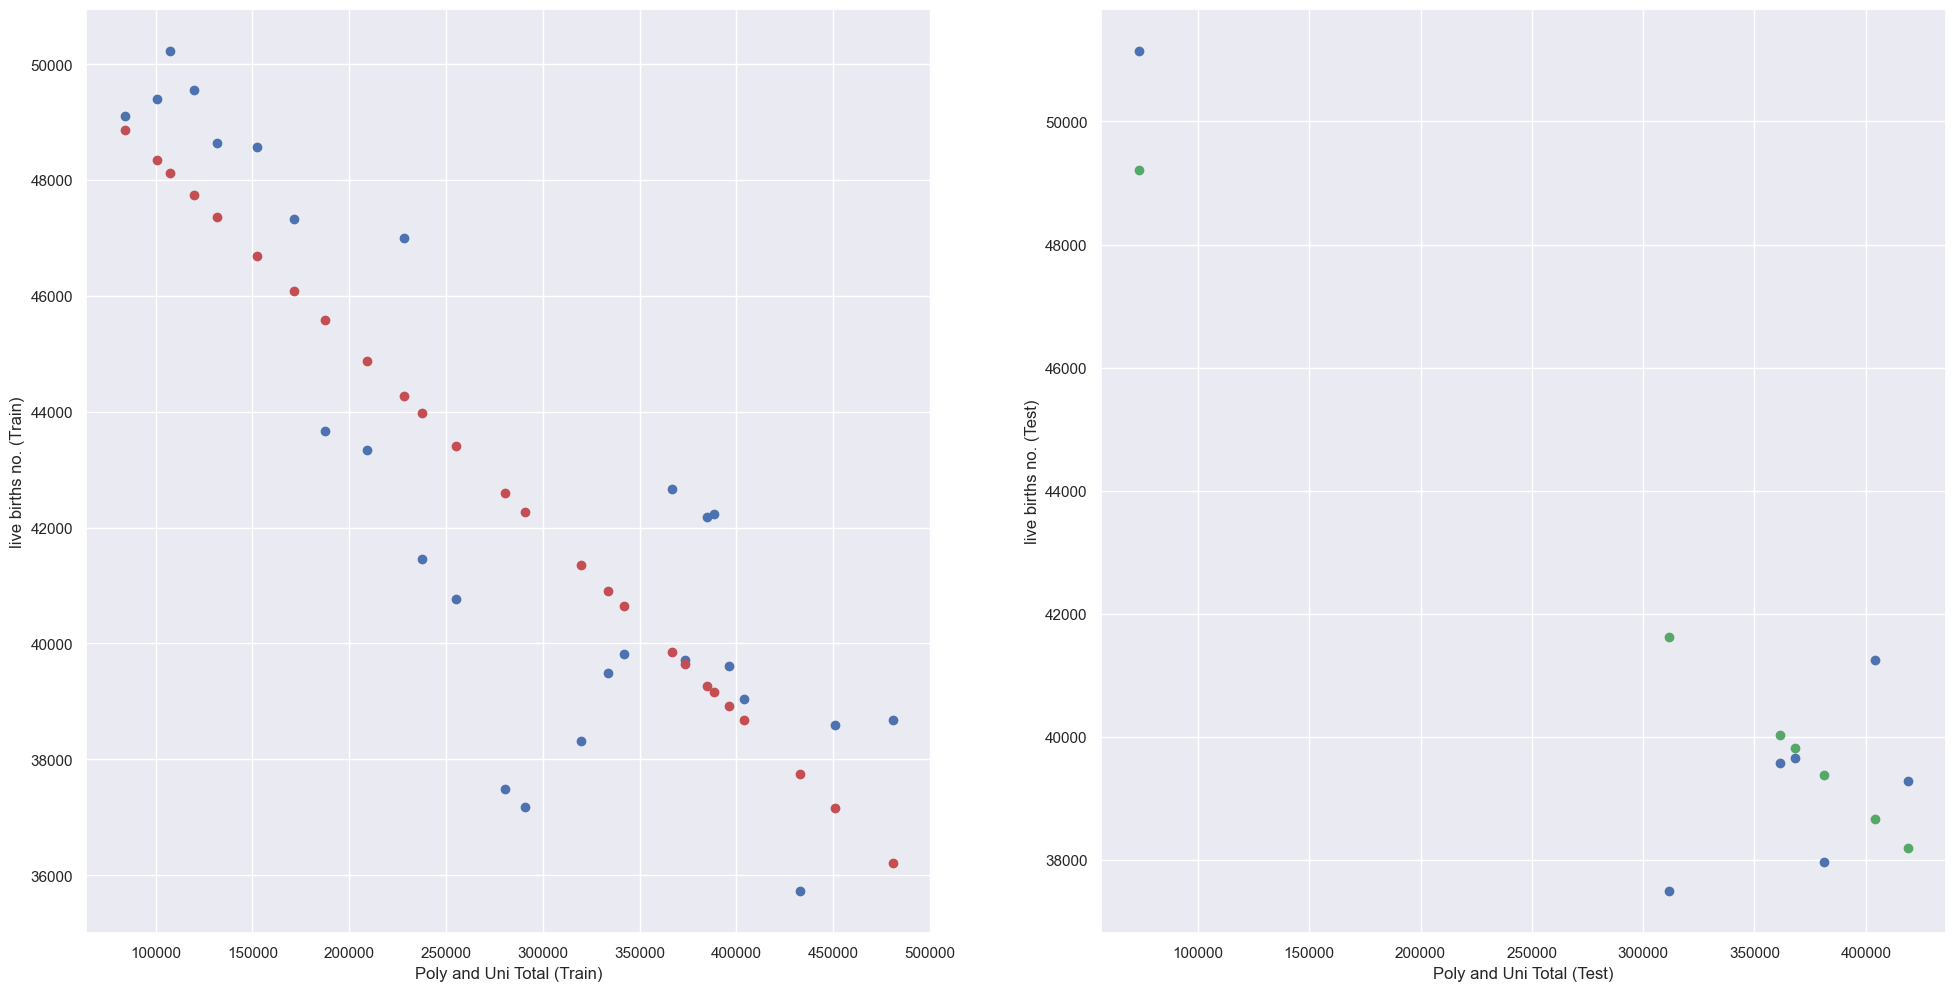

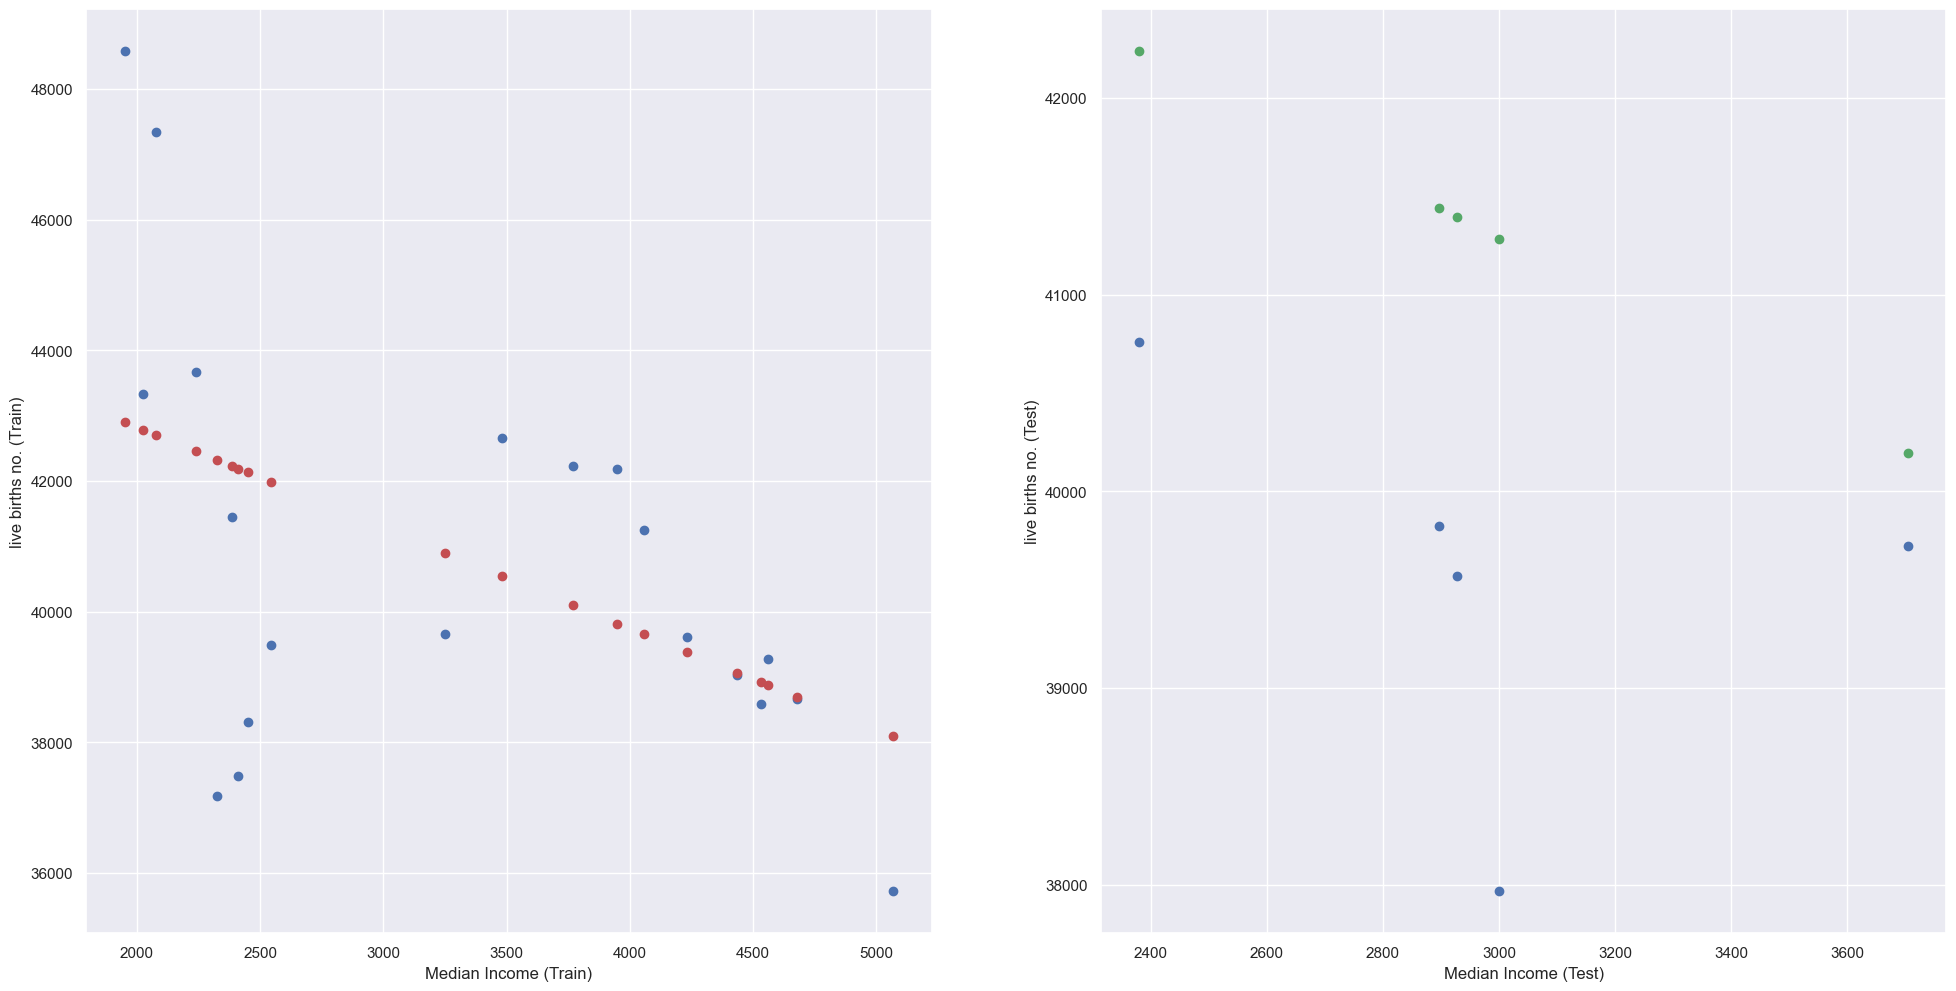

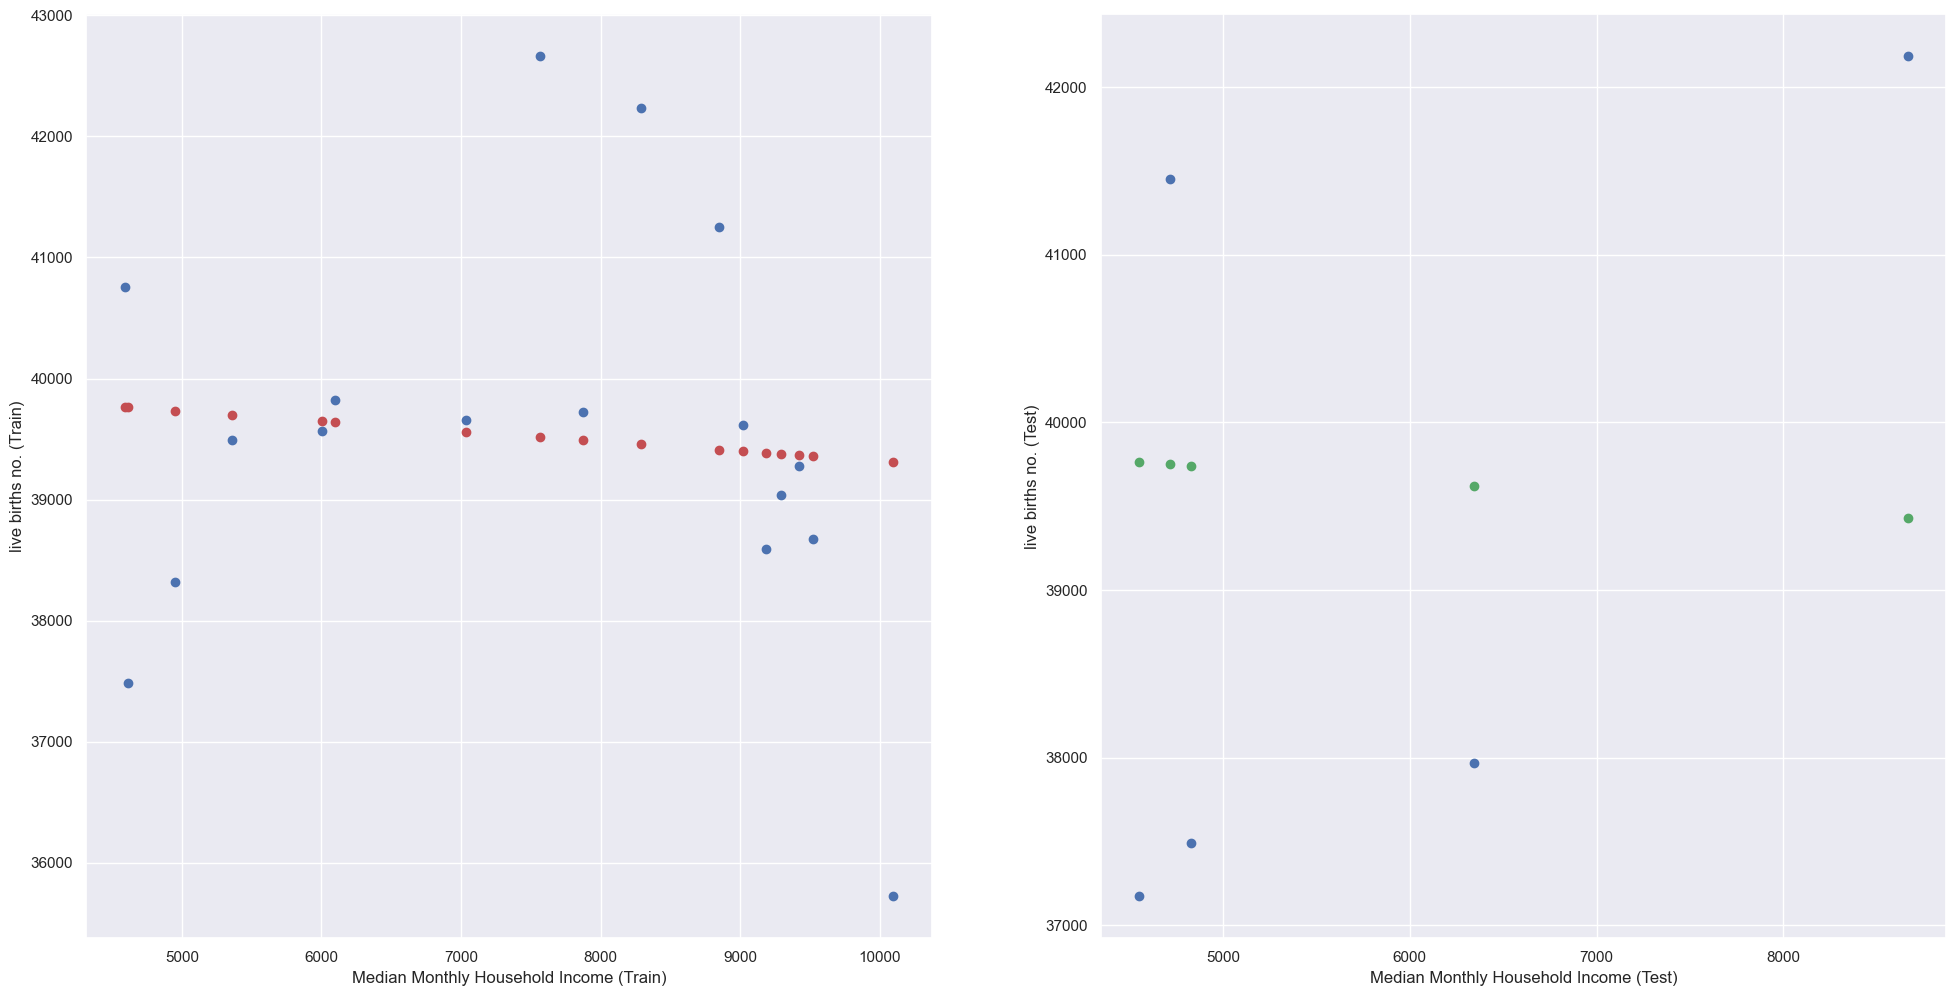

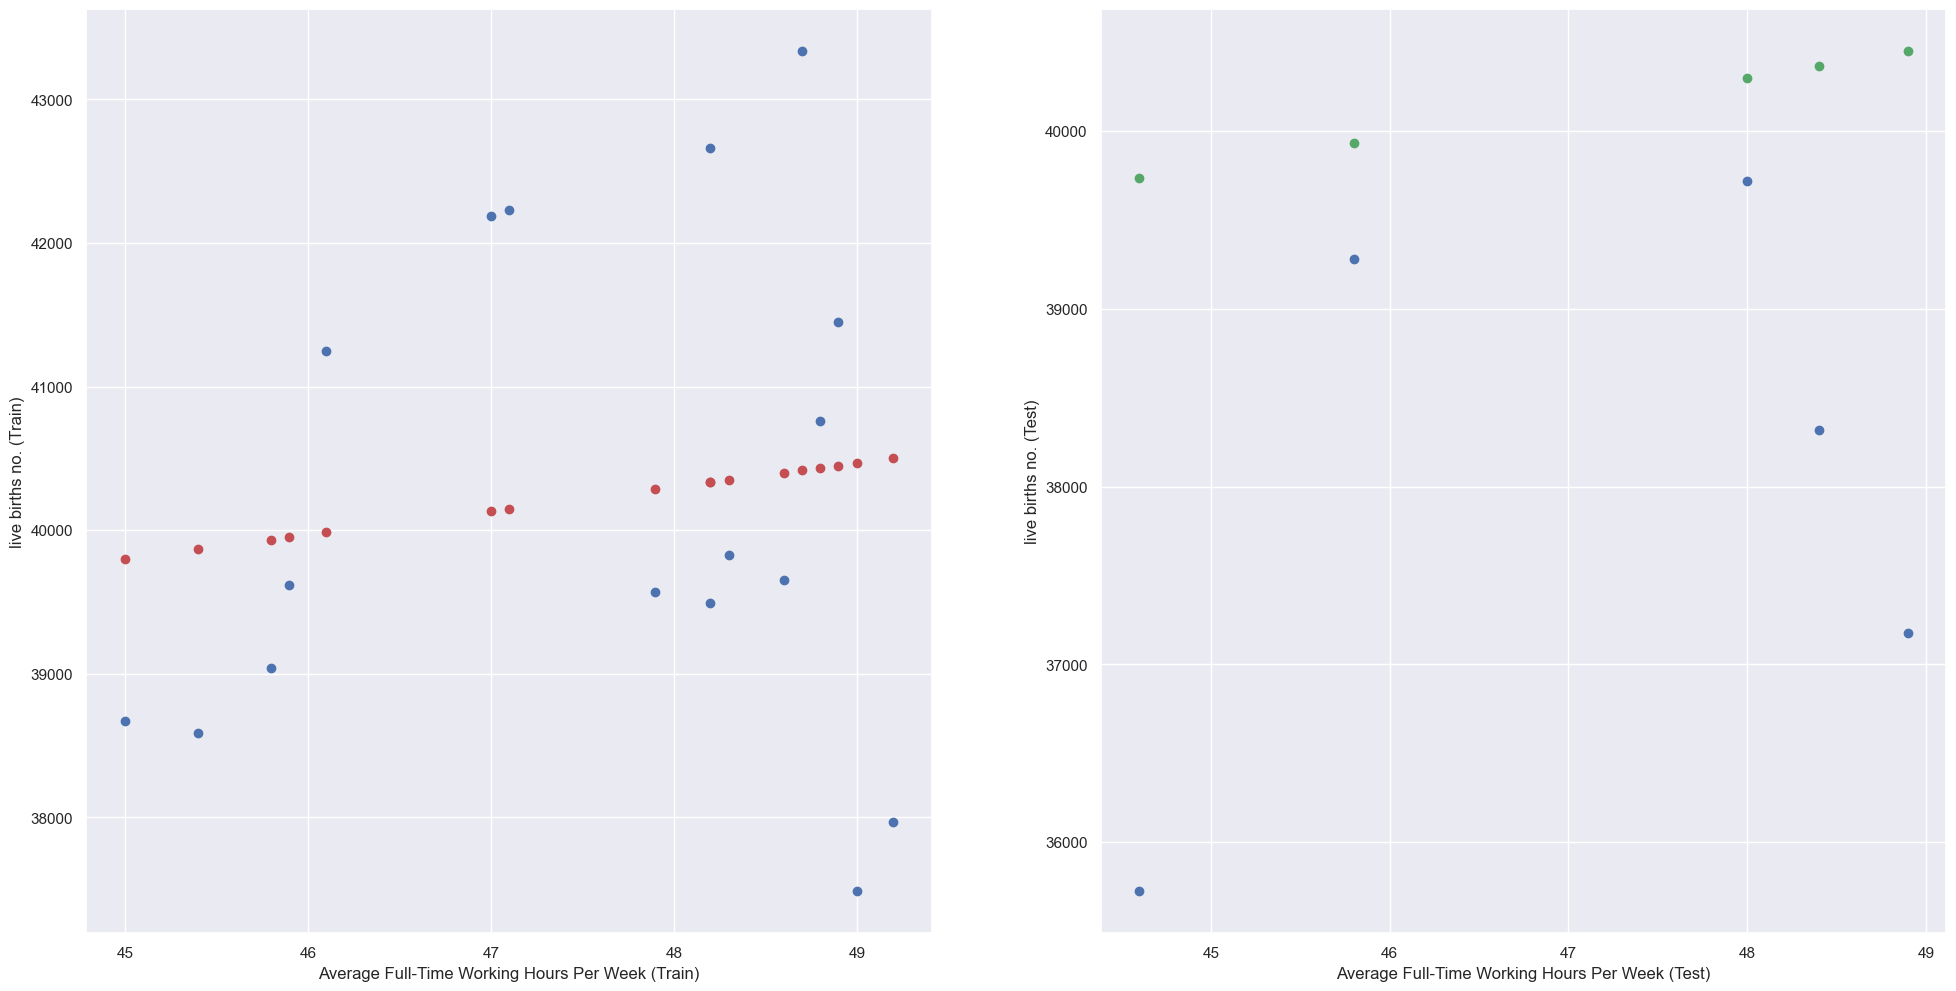

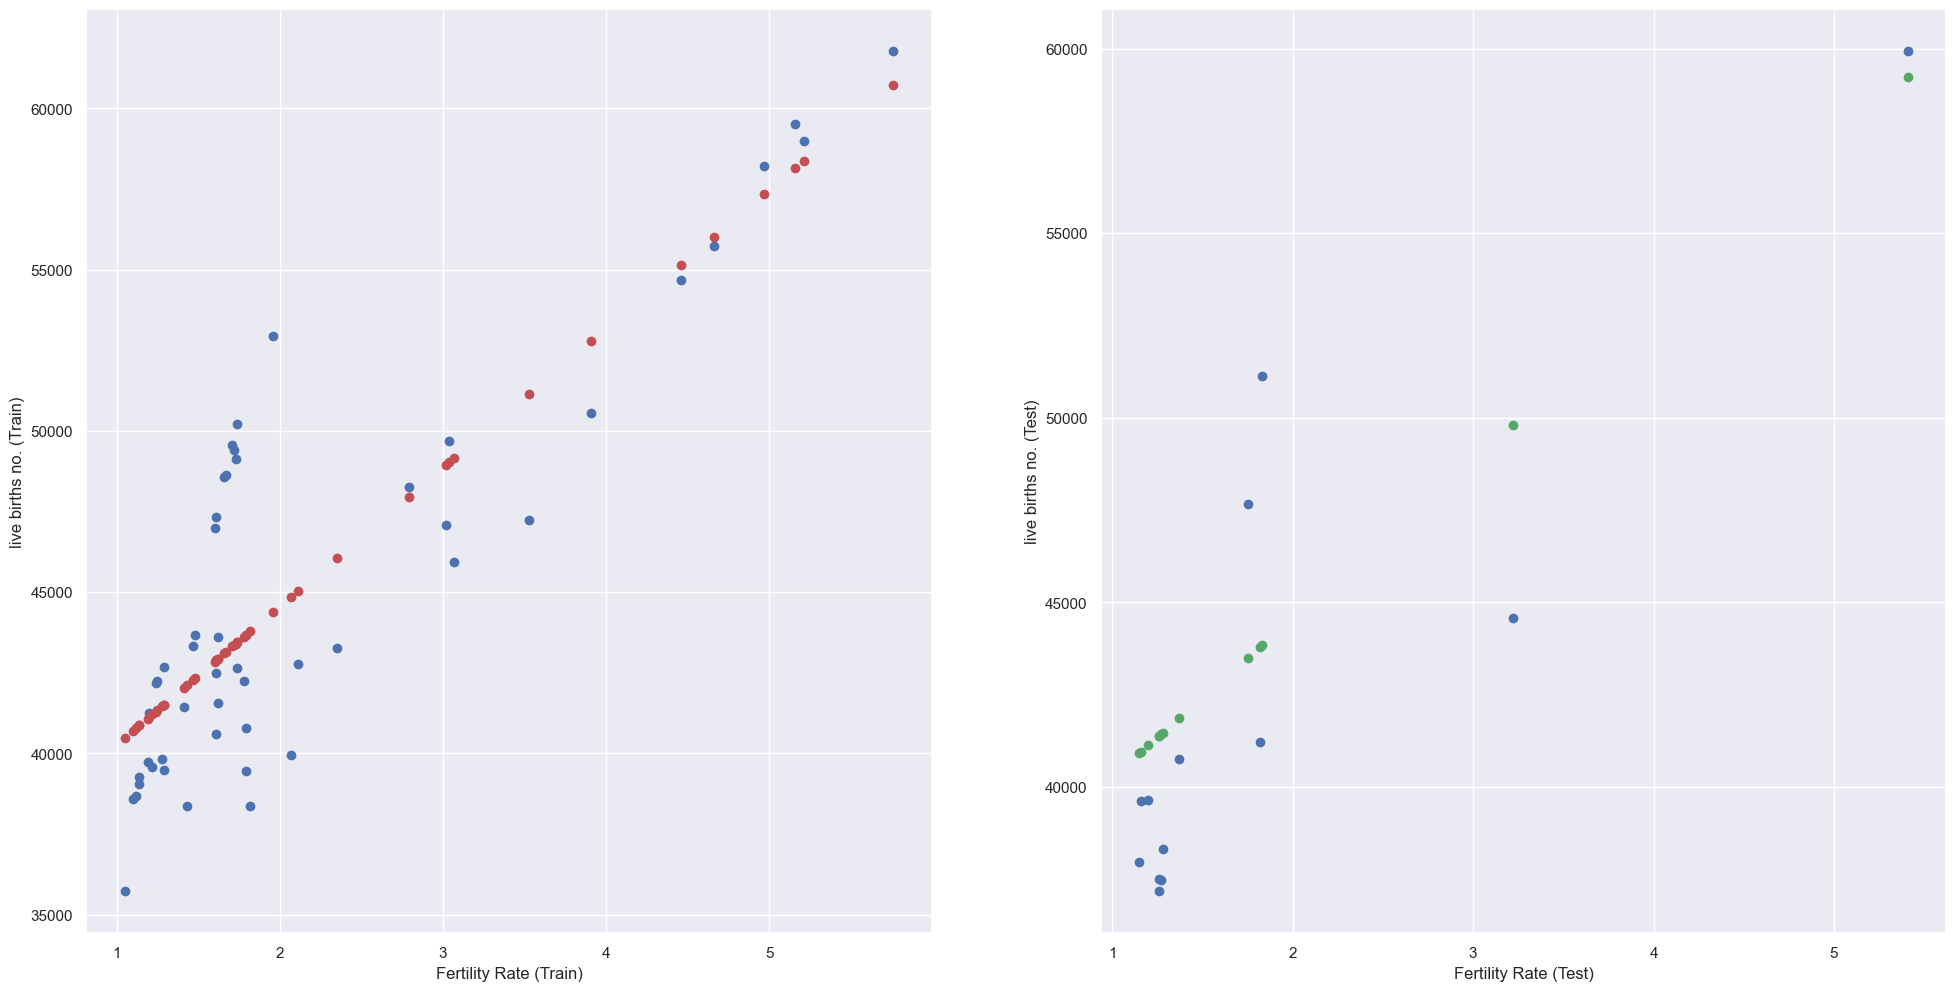

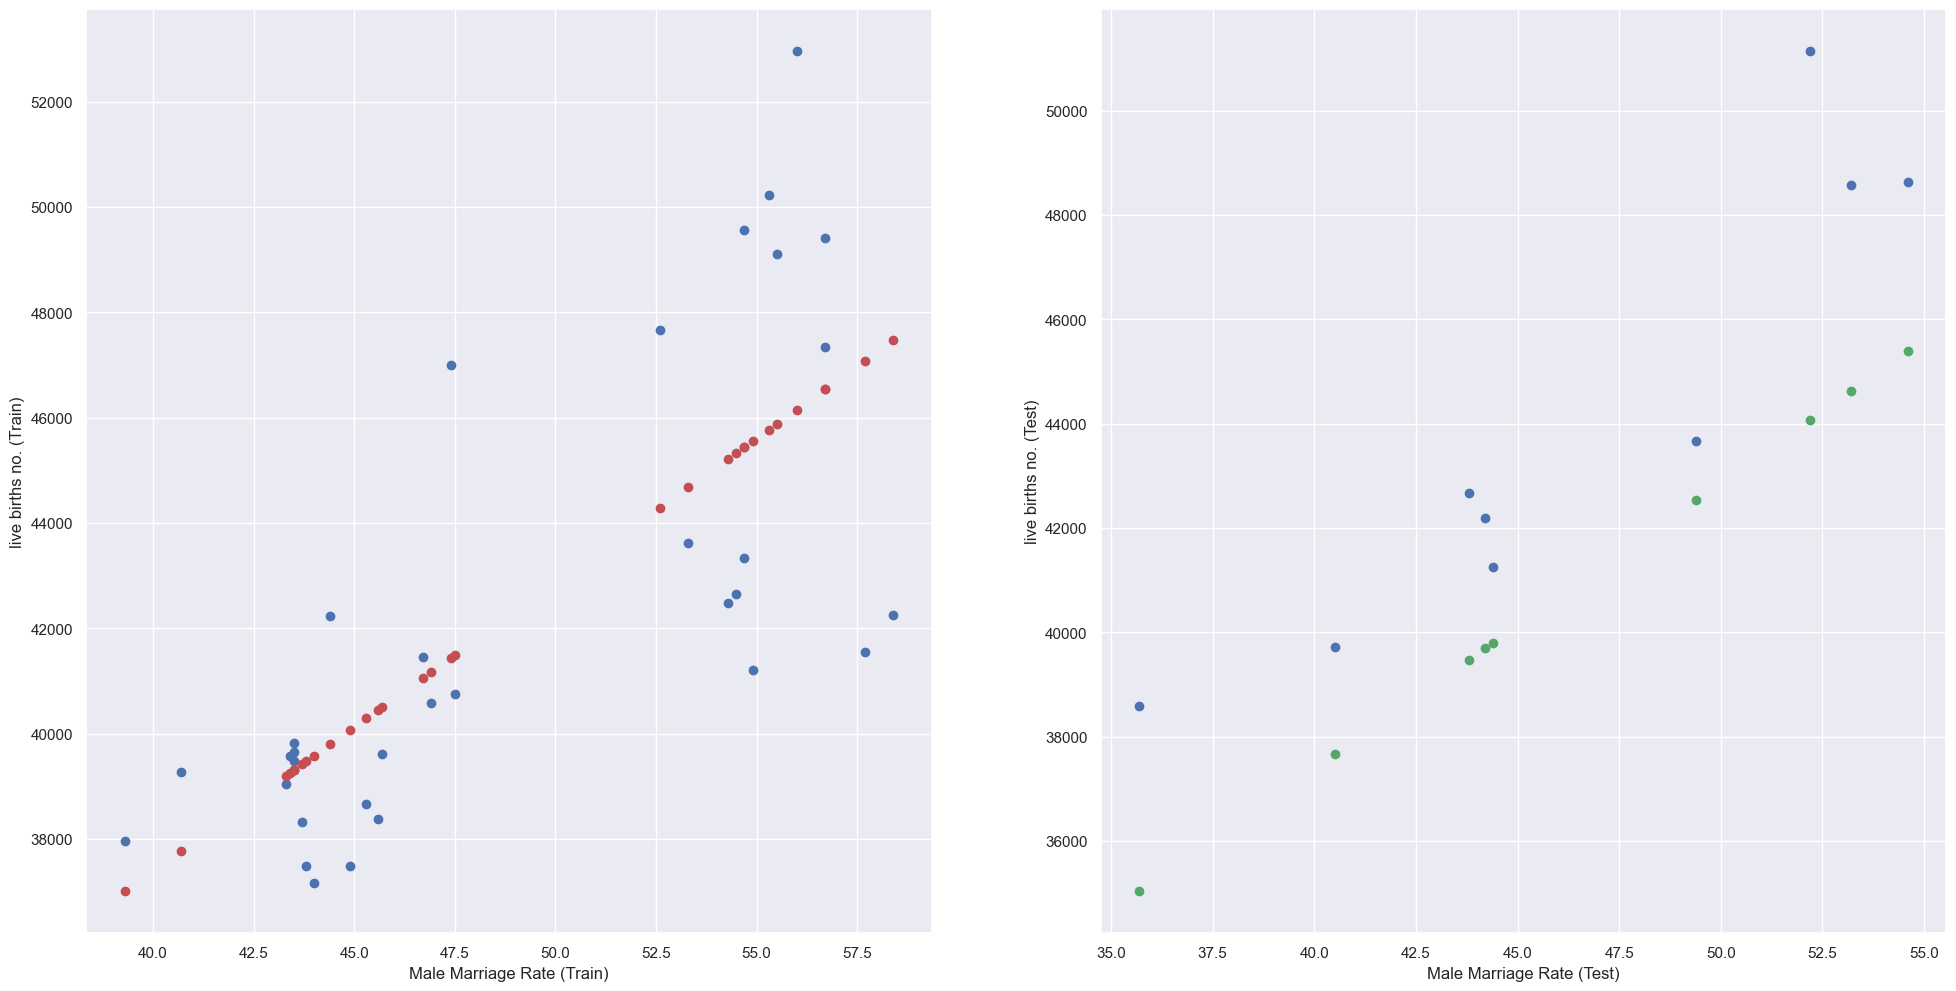

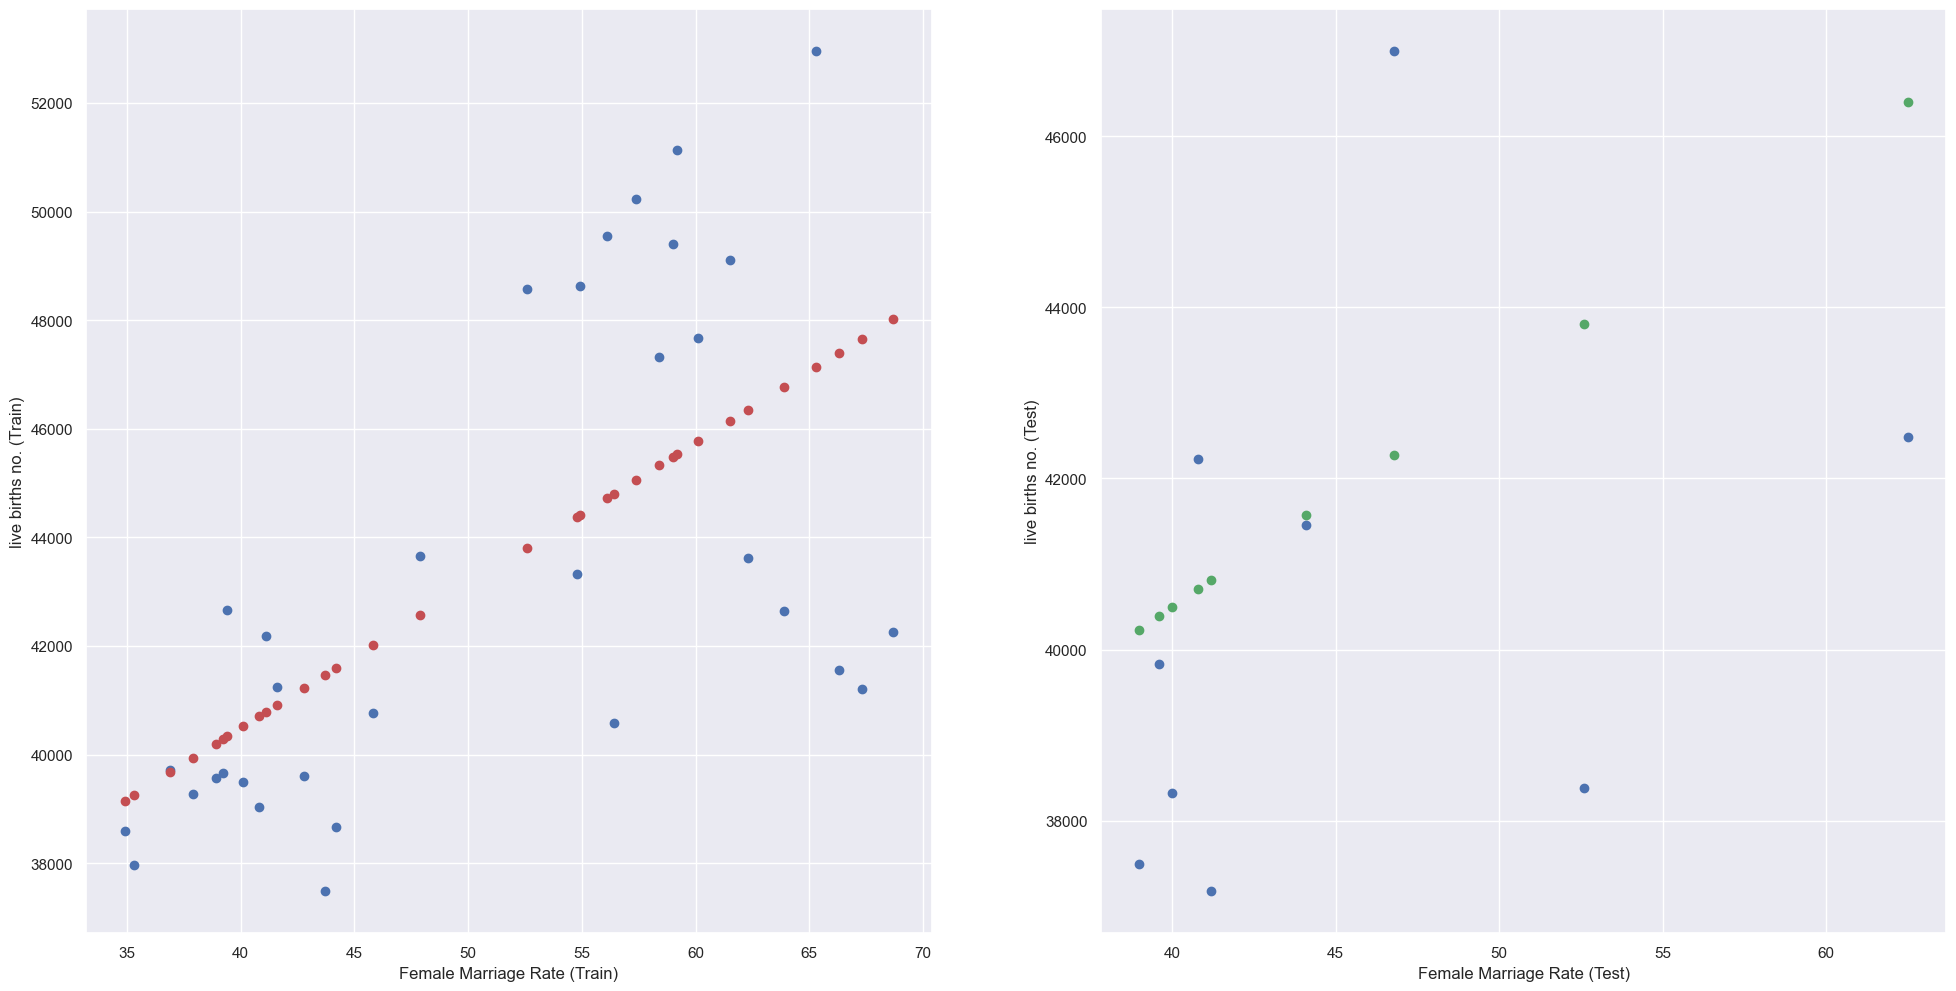

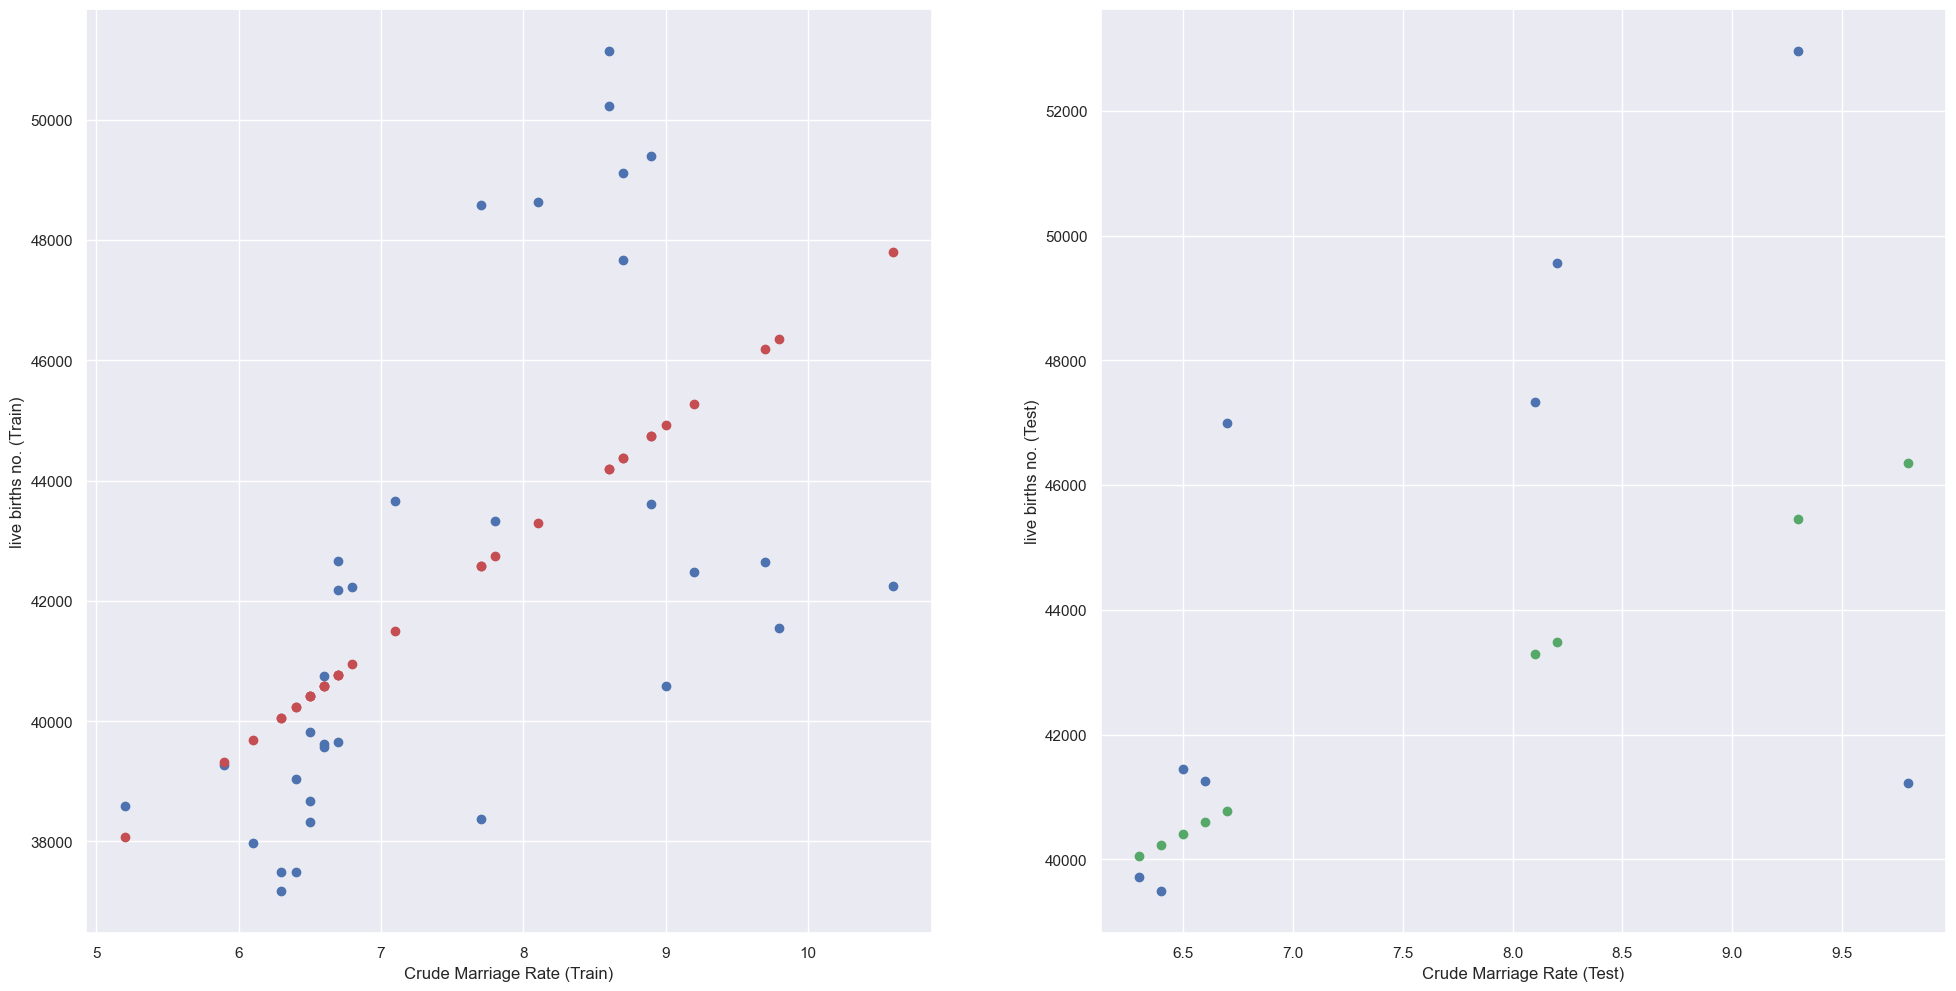

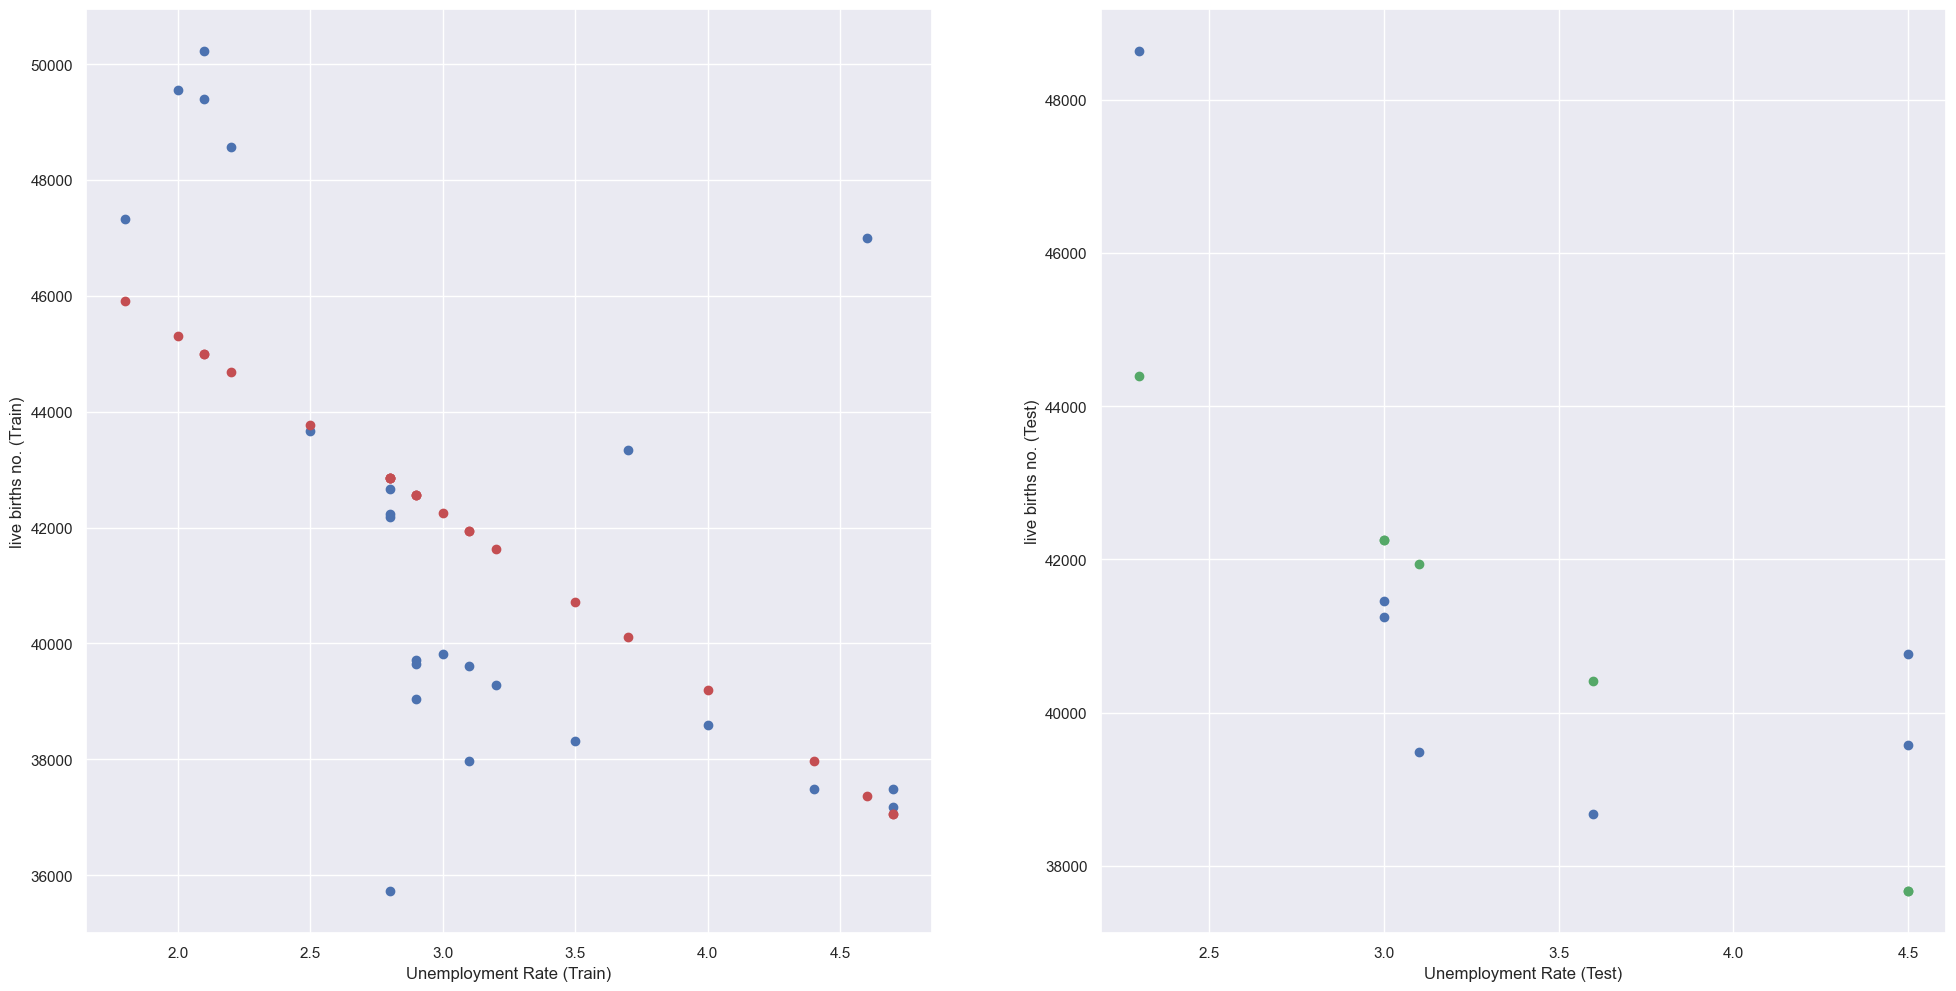

In [59]:
X_all = annual_combined_data[["Total Population (Number)", "Resident Population (Number)", "Singapore Citizen Population (Number)", "Permanent Resident Population (Number)", "Non-Resident Population (Number)", "Total Residents", "Number of 20-39 RESIDENTS", "Number of Female 20-39 RESIDENTS", "Number of brides (Total under 39)", "Number of brides (Total under 44)", "Number of brides (Total)", "Overall average schooling years", "Males average schooling years", "Females average schooling years", "Old-Age Support Ratio:Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over (Number)", "Old-Age Dependency Ratio:Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number)", "Number of people with minimum education", "Female poly & uni 25_39", "Poly and Uni Total", "Median Income", "Median Monthly Household Income", "Average Full-Time Working Hours Per Week", "Fertility Rate", "Male Marriage Rate", "Female Marriage Rate", "Crude Marriage Rate", "Unemployment Rate"]]
y_original = annual_combined_data['number of live_birth in the year']


for column in X_all:
    print(column)
    x = X_all[column]
    y = y_original.copy()
    mask = ~np.isnan(x) & ~np.isnan(y)
    
    x = pd.DataFrame(x[mask])
    y = pd.DataFrame(y_original[mask])
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    
    linreg = linear_model.LinearRegression()
    linreg.fit(x_train, y_train)
    
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
    
    # Plot linear regression line for both train and test data, using data from train data to get linear regression line
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(x_train, y_train, color = "b")
    axes[0].scatter(x_train, y_train_pred, color = "r")
    ## axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel(f"{column} (Train)")
    axes[0].set_ylabel("live births no. (Train)")
    axes[1].scatter(x_test, y_test, color = "b")
    axes[1].scatter(x_test, y_test_pred, color = "g")
    ## axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel(f"{column} (Test)")
    axes[1].set_ylabel("live births no. (Test)")
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    print(f"RMSE of test data = {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
    print()
    print()

## The variables against live birth numbers
### Metrics obtained

- For Total Population (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [55012.6223894]
> * Coefficients of Regression 	: a =  [[-0.0030886]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.3949540943927632
> * Mean Squared Error (MSE) 	: 27181444.855409816
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.06146386706250273
> * Mean Squared Error (MSE) 	: 17805383.313949846
>
>
> * RMSE of test data = 4219.642557604831

- For Resident Population (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [53523.83927299]
> * Coefficients of Regression 	: a =  [[-0.00337036]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.23200926602363126
> * Mean Squared Error (MSE) 	: 13045670.1801503
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.3388151602488012
> * Mean Squared Error (MSE) 	: 17658563.121758208
>
>
> * RMSE of test data = 4202.209314367647

- For Singapore Citizen Population (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [62552.26670336]
> * Coefficients of Regression 	: a =  [[-0.00655981]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.3497495270008397
> * Mean Squared Error (MSE) 	: 11971882.55426772
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.44429133814475996
> * Mean Squared Error (MSE) 	: 12734617.767105851
>
>
> * RMSE of test data = 3568.5596207862145

- For Permanent Resident Population (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [49623.6503921]
> * Coefficients of Regression 	: a =  [[-0.02075645]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.5240037237005767
> * Mean Squared Error (MSE) 	: 8915112.598952465
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.7726938283044344
> * Mean Squared Error (MSE) 	: 4979777.424603484
>
>
> * RMSE of test data = 2231.5414906748842

- For Non-Resident Population (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [45613.00271101]
> * Coefficients of Regression 	: a =  [[-0.0041804]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.2860692793086843
> * Mean Squared Error (MSE) 	: 12112536.99552994
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.20032521325290586
> * Mean Squared Error (MSE) 	: 19966322.329922274
>
>
> * RMSE of test data = 4468.369090610385

- For Total Residents, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [61195.75464695]
> * Coefficients of Regression 	: a =  [[-0.00572802]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.43306576900125626
> * Mean Squared Error (MSE) 	: 24146288.31174476
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4294474901353358
> * Mean Squared Error (MSE) 	: 18483872.097285006
>
>
> * RMSE of test data = 4299.287394125334

- For Number of 20-39 RESIDENTS, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [61229.29531021]
> * Coefficients of Regression 	: a =  [[-0.0174241]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.4037524898032576
> * Mean Squared Error (MSE) 	: 27317774.50095883
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.09720016639966378
> * Mean Squared Error (MSE) 	: 16311285.23378698
>
>
> * RMSE of test data = 4038.7232182692314

- For Number of Female 20-39 RESIDENTS, after running the data set until satisfactory values

> * Intercept of Regression 	: b = [60921.46076723] 
> * Coefficients of Regression 	: a =  [[-0.03417713]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.46698341459049353
> * Mean Squared Error (MSE) 	: 22403960.0562915
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.09168607896336967
> * Mean Squared Error (MSE) 	: 31261855.604635462
>
>
> * RMSE of test data = 5591.230240710488

- For Number of brides (Total under 39), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [57501.34464148]
> * Coefficients of Regression 	: a =  [[-0.77092662]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.36503442950483356
> * Mean Squared Error (MSE) 	: 19071582.27983602
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4663983380878802
> * Mean Squared Error (MSE) 	: 29254243.306702193
>
>
> * RMSE of test data = 5408.71919281286

- For Number of brides (Total under 44), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [59471.42184108]
> * Coefficients of Regression 	: a =  [[-0.86587629]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.5137396801054603
> * Mean Squared Error (MSE) 	: 18781381.71130981
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.06701763971250108
> * Mean Squared Error (MSE) 	: 27959730.080470342
>
>
> * RMSE of test data = 5287.696103263721

- For Number of brides (Total), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [57995.00919247]
> * Coefficients of Regression 	: a =  [[-0.61774225]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.40105121611796546
> * Mean Squared Error (MSE) 	: 18841437.876038115
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.5254961643742209
> * Mean Squared Error (MSE) 	: 25179289.625716966
>
>
> * RMSE of test data = 5017.8969325522185

- For Overall average schooling years, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [51832.93020143]
> * Coefficients of Regression 	: a =  [[-1076.83504947]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.23535866816601136
> * Mean Squared Error (MSE) 	: 15334967.690143177
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4653317100643566
> * Mean Squared Error (MSE) 	: 10773255.670561329
>
>
> * RMSE of test data = 3282.2638027071084

- For Males average schooling years, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [50727.95717593]
> * Coefficients of Regression 	: a =  [[-935.61694847]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.17733005519279665
> * Mean Squared Error (MSE) 	: 12609592.36405652
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.32345791986228123
> * Mean Squared Error (MSE) 	: 23170066.392687056
>
>
> * RMSE of test data = 4813.529515094621

- For Females average schooling years, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [49436.38975081]
> * Coefficients of Regression 	: a =  [[-895.79341503]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.18510629152476765
> * Mean Squared Error (MSE) 	: 15340594.12154568
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4722908041554743
> * Mean Squared Error (MSE) 	: 12736143.821191309
>
>
> * RMSE of test data = 3568.77343371519

- For Old-Age Support Ratio:Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [30948.81276042]
> * Coefficients of Regression 	: a =  [[1608.17324813]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.6047362946881097
> * Mean Squared Error (MSE) 	: 8299833.308957683
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.5135586098341276
> * Mean Squared Error (MSE) 	: 8144366.009411893
>
>
> * RMSE of test data = 2853.8335637194914

- For Old-Age Dependency Ratio:Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number), after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [50332.45756577]
> * Coefficients of Regression 	: a =  [[-527.97749496]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.4000854326459352
> * Mean Squared Error (MSE) 	: 13335914.948397188
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.36417692197225615
> * Mean Squared Error (MSE) 	: 7431879.397966323
>
>
> * RMSE of test data = 2726.1473544117757

- For Number of people with minimum education, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [60765.39507161]
> * Coefficients of Regression 	: a =  [[-0.00798456]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.5892272447159039
> * Mean Squared Error (MSE) 	: 7404282.68212105
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.7169400043147185
> * Mean Squared Error (MSE) 	: 6744868.89236509
>
>
> * RMSE of test data = 2597.088541495089

- For Female poly & uni 25_39, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [48624.69872965]
> * Coefficients of Regression 	: a =  [[-0.03093015]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.6153635724199416
> * Mean Squared Error (MSE) 	: 6883933.76922672
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.5958634863707385
> * Mean Squared Error (MSE) 	: 6429184.876926078
>
>
> * RMSE of test data = 2535.5837349466647

- For Poly and Uni Total, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [50076.82277801]
> * Coefficients of Regression 	: a =  [[-0.0278921]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.6046703714508295
> * Mean Squared Error (MSE) 	: 5554965.04028427
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.8007139096400038
> * Mean Squared Error (MSE) 	: 6305403.862473655
>
>
> * RMSE of test data = 2511.0563240344995

- For Median Income, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [46052.37134461]
> * Coefficients of Regression 	: a =  [[-1.65203164]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.2736345315658192
> * Mean Squared Error (MSE) 	: 6788584.799727177
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.9507718377576282
> * Mean Squared Error (MSE) 	: 6418157.172841597
>
>
> * RMSE of test data = 2533.4082128314017

- For Median Monthly Household Income, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [39899.71377789]
> * Coefficients of Regression 	: a =  [[-0.05049972]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.00308803684964698
> * Mean Squared Error (MSE) 	: 3026802.9638440567
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.10860354770674818
> * Mean Squared Error (MSE) 	: 3228654.579341469
>
>
> * RMSE of test data = 1796.8457305348918

- For Average Full-Time Working Hours Per Week, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [37364.10012792]
> * Coefficients of Regression 	: a =  [[56.09373183]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.0018959117562981076
> * Mean Squared Error (MSE) 	: 2957247.949159612
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -0.39659234258011966
> * Mean Squared Error (MSE) 	: 5305075.226412946
>
>
> * RMSE of test data = 2303.2748916299474

- For Fertility Rate, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [34838.52838809]
> * Coefficients of Regression 	: a =  [[4654.44678281]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.7655337304082355
> * Mean Squared Error (MSE) 	: 9994280.540339863
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.45741394338266483
> * Mean Squared Error (MSE) 	: 16288942.667166935
>
>
> * RMSE of test data = 4035.9562271123477

- For Male Marriage Rate, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [15980.55322344]
> * Coefficients of Regression 	: a =  [[546.49962052]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.5924202723602463
> * Mean Squared Error (MSE) 	: 7701855.822340788
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.1691851119237454
> * Mean Squared Error (MSE) 	: 13267195.989064759
>
>
> * RMSE of test data = 3642.4162295191854

- For Female Marriage Rate, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [25265.01380243]
> * Coefficients of Regression 	: a =  [[369.31658152]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.5757805263889537
> * Mean Squared Error (MSE) 	: 9459486.515904617
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: -10.220839040818237
> * Mean Squared Error (MSE) 	: 27418829.46408984
>
>
> * RMSE of test data = 5236.299214530224

- For Crude Marriage Rate, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [27272.31276775]
> * Coefficients of Regression 	: a =  [[2044.08576648]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.3714407047937306
> * Mean Squared Error (MSE) 	: 12154773.514039788
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.02261480914356173
> * Mean Squared Error (MSE) 	: 15133925.062348833
>
>
> * RMSE of test data = 3890.2345767766797

- For Unemployment Rate, after running the data set until satisfactory values

> * Intercept of Regression 	: b =  [50566.99682091]
> * Coefficients of Regression 	: a =  [[-2750.89279407]]
> 
> 
> * Goodness of Fit of Model 	Train Dataset
> * Explained Variance (R^2) 	: 0.3321278856339621
> * Mean Squared Error (MSE) 	: 11966652.232559167
> 
>
> * Goodness of Fit of Model 	Test Dataset
> * Explained Variance (R^2) 	: 0.4087794636879132
> * Mean Squared Error (MSE) 	: 8539126.561140476
>
>
> * RMSE of test data = 2922.1783931068403

### Based on the MSE and RMSE for predicted being high, the low explained variance for the test data such as -10.220839040818237 for Female Marriage Rate, and the graph visual representation, especially the scarce number of data points

### Thus, we have decided that linear regression is not useful and viable for predicting the future live birth numbers

### As such, we will be doing classification of the live birth numbers to predict whether the live birth numbers will increase or decrease, which is provides a more reliable result, especially considering the low number of data points, but the extent of each variable's impact and importance will still be considered

### The correlation obtained can still be useful to see its relation to the live birth number, as such, we will take note of variables with high correlation to live birth number, such as
> * Number of people with poly and uni education level => -0.86
> * Number of poly and uni educated Females between 25 to 39 years old => -0.82
> * Number of people with a certain level of minimum education => -0.81
> * Old-Age support ratio: Citixens aged 20-64 years per citizen aged 65 and over => 0.77
> * Permanent resident population => -0.77
> * Male Marriage Rate => 0.72

> * Fertility Rate => 0.85 // but it is not a cause like infant death issue in monthly data!